# Fake Job Posting Prediction Model

## Data Dictionary

- job_id-Unique Job ID
- title-The title of the job ad entry.
- location-Geographical location of the job ad.
- department-Corporate department (e.g. sales).
- salary_range-Indicative salary range (e.g. $50,000-$60,000)
- company_profile-A brief company description.
- description-The details description of the job ad.
- requirements-Enlisted requirements for the job opening.
- benefits-Enlisted offered benefits by the employer
- telecommuting-True for telecommuting positions.
- has_company_logo-True if company logo is present.
- has_questions-True if screening questions are present.
- employment_type-Full-type, Part-time, Contract, etc.
- required_experience-Executive, Entry level, Intern, etc.
- required_education-Doctorate, Master’s Degree, Bachelor, etc.
- industry-Automotive, IT, Health care, Real estate, etc.
- function-Consulting, Engineering, Research, Sales etc.
- fraudulent-target - Classification attribute.

## Functions

In [4]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [5]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    data[feature].describe()
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [6]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [7]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

## Importing Libraries

In [9]:
import warnings
warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Loading Dataset

In [11]:
df = pd.read_csv("fake_job_postings.csv")

## Data Overview

In [13]:
df.sample(10)

job_id                                              title  \
1295     1296                        Sr UI/UX Designer/Developer   
14311   14312                                  Report specialist   
13758   13759                         Senior ASP.NET/C# Engineer   
8689     8690                       Credit and Collections Clerk   
14680   14681                            Instructional Advocate    
15349   15350                           Junior Community Monitor   
9987     9988                              Employment Specialist   
13345   13346                       Package Delivery Driver - SF   
13082   13083  Office & Travel Manager (30h part-time or full...   
11769   11770                   Product Development Engineer PLC   

                            location       department   salary_range  \
1295         US, CA, Manhattan Beach           Design            NaN   
14311                  LT, , Vilnius  Client Services            NaN   
13758             US, PA, Pittsburgh              NaN            NaN   
8689                        US, WA,           Account    37000-40000   
14680               US, GA, Savannah              NaN            NaN   
15349                US, IL, Chicago  Client Services            NaN   
9987                US, OR, Portland              NaN            NaN   
13345  US, CA, San Francisco/Oakland       Operations            NaN   
13082                 DE, BE, Berlin              G&A    28000-32000   
11769                TW, TPQ, Taipei      Engineering  120000-180000   

                                         company_profile  \
1295   The Boston Consulting Group (#URL_45423e1e1670...   
14311                                                NaN   
13758  S2scout, is a Pittsburgh-based talent aquisiti...   
8689   Basil Lifecare Pvt. Ltd. is a Wellness &amp; P...   
14680  We are an after-school program committed to as...   
15349  BCV is the premier full-service social media p...   
9987   United Cerebral Palsy of Oregon &amp; SW Washi...   
13345  Shyp is the easiest way to send anything, anyw...   
13082  RhodeCode provides the leading source code man...   
11769  Aptitude Staffing Solutions has redesigned the...   

                                             description  \
1295   THE COMPANY: BCG Digital Ventures (#URL_4968ff...   
14311  As Report Specialist you will become guru of A...   
13758  Michael Bolton: Samir and I are the best progr...   
8689   The credit and collections clerk directly supp...   
14680  21st Century Community Learning Centers is an ...   
15349  Working with your Senior Account Executives, t...   
9987   United Cerebral Palsy (UCP) is currently seeki...   
13345  Shyp is in search of smart, friendly, safety-c...   
13082  Every day millions of developers, project mana...   
11769    Product Development Engineer, PLC TaiwanWork...   

                                            requirements  \
1295   EDUCATION: Undergraduate degree in Graphic or ...   
14311  Requirements:•    Be FUN and have great commun...   
13758  •7+ years of experience developing software in...   
8689                                              #NAME?   
14680  Bachelor's Degree or an Associate's Degree; or...   
15349  0-1+ years of professional work experience (ex...   
9987   MINIMUM QUALIFICATIONS:Bachelor’s Degree and/o...   
13345  High school diploma or equivalent educationMus...   
13082  2+ years experience in Office / Feelgood Manag...   
11769  Skills and Requirements: At least 5+ years PLC...   

                                                benefits  telecommuting  \
1295   Why BCG?Is BCG for me?Career GrowthWorking at ...              0   
14311  We offer:•    Full-time (40 hours per week) jo...              0   
13758  100% employer paid benefitsCompetitive bonus &...              0   
8689   career. We offer a competitive salary and bene...              0   
14680                                                NaN              0   
15349                           

In [14]:
df.shape

(17880, 18)

17880 rows and 18 columns

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [17]:
#checking the amount of unique values in each feature
df.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11967
benefits                6204
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
#Looking at statistics of numeric features
df.describe().T

count         mean          std  min      25%     50%  \
job_id            17880.0  8940.500000  5161.655742  1.0  4470.75  8940.5   
telecommuting     17880.0     0.042897     0.202631  0.0     0.00     0.0   
has_company_logo  17880.0     0.795302     0.403492  0.0     1.00     1.0   
has_questions     17880.0     0.491723     0.499945  0.0     0.00     0.0   
fraudulent        17880.0     0.048434     0.214688  0.0     0.00     0.0   

                       75%      max  
job_id            13410.25  17880.0  
telecommuting         0.00      1.0  
has_company_logo      1.00      1.0  
has_questions         1.00      1.0  
fraudulent            0.00      1.0

In [20]:
# Looking at our target variable
df['fraudulent'].value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

17014 real postings 866 fake postings

In [22]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

### Observations

- Null values in:
    - Location
    - Department
    - Salaray Range
    - Company_Profile
    - Description
    - requirements
    - benefits
    - employment_type
    - require_experience
    - required_education
    - industry
    - function
- No real numeric values 
- Zero duplicated variables
- Job_Id is a unique value need to take it out
- 4 text colums in:
    - company_profile
    - description
    - requirements
    - benefits

In [25]:
#Removing Job_Id
df = df.drop(['job_id'], axis=1)

In [26]:
df.duplicated().sum()

281

In [27]:
df = df.drop_duplicates()

## Handling Missing Values

In [29]:
df.isnull().sum()

title                      0
location                 341
department             11328
salary_range           14772
company_profile         3282
description                1
requirements            2649
benefits                7108
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3428
required_experience     6962
required_education      8009
industry                4837
function                6363
fraudulent                 0
dtype: int64

In [30]:
#Changing all null values to unkown, doing this as unkown values may give insight. May change after model is run
df.fillna("Unknown", inplace=True)

In [31]:
df.isnull().sum()

title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

## Univariate EDA

In [33]:
df.dtypes

title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

### Title

In [35]:
df.title.value_counts()

title
English Teacher Abroad                                         309
Graduates: English Teacher Abroad (Conversational)             144
Customer Service Associate                                     141
English Teacher Abroad                                          94
Software Engineer                                               86
                                                              ... 
Senior Mechanical Design Engineer                                1
.Net Production Support                                          1
 Senior Big Data Consultant                                      1
Telemarketer or Appointment Setter                               1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: count, Length: 11231, dtype: int64

### location

In [37]:
df.location.value_counts()

location
GB, LND, London             718
US, NY, New York            644
US, CA, San Francisco       466
GR, I, Athens               462
Unknown                     341
                           ... 
GB, , Bedford                 1
IL, JM, Jerusalem             1
US, MI, Marcellus Lawton      1
ZA, GT, Four Ways             1
GB, WSX, Chichester           1
Name: count, Length: 3106, dtype: int64

In [38]:
# splitting location into country, state, and city will use this information for further EDA
def split_location(location):
    parts = location.split(', ')
    country = parts[0] if len(parts) > 0 else None
    state = parts[1] if len(parts) > 1 else None
    city = parts[2] if len(parts) > 2 else None
    return country, state, city

# Split location and add country, state, and city columns to the DataFrame
df[['Country', 'State', 'City']] = df['location'].apply(lambda x: pd.Series(split_location(x)))

In [39]:
df.head()

title            location department  \
0                           Marketing Intern    US, NY, New York  Marketing   
1  Customer Service - Cloud Video Production      NZ, , Auckland    Success   
2    Commissioning Machinery Assistant (CMA)       US, IA, Wever    Unknown   
3          Account Executive - Washington DC  US, DC, Washington      Sales   
4                        Bill Review Manager  US, FL, Fort Worth    Unknown   

  salary_range                                    company_profile  \
0      Unknown  We're Food52, and we've created a groundbreaki...   
1      Unknown  90 Seconds, the worlds Cloud Video Production ...   
2      Unknown  Valor Services provides Workforce Solutions th...   
3      Unknown  Our passion for improving quality of life thro...   
4      Unknown  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                            Unknown              0   
1  What you will get from usThrough being part of...              0   
2                                            Unknown              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0         Unknown             Unknown   
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0            Unknown                    Unknown             Marketing   
1            Unknown  Marketing and Advertising      Customer Service   
2            Unknown                    Unknown               Unknown   
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent Country State        City  
0           0      US    NY    New York  
1           0      NZ          Auckland  
2           0      US    IA       Wever  
3           0      US    DC  Washington  
4           0      US    FL  Fort Worth

In [40]:
df.isnull().sum()

title                    0
location                 0
department               0
salary_range             0
company_profile          0
description              0
requirements             0
benefits                 0
telecommuting            0
has_company_logo         0
has_questions            0
employment_type          0
required_experience      0
required_education       0
industry                 0
function                 0
fraudulent               0
Country                  0
State                  432
City                   432
dtype: int64

In [41]:
df.fillna("Unknown", inplace=True)

### Department

In [43]:
df.department.value_counts()

department
Unknown                       11329
Sales                           541
Engineering                     483
Marketing                       397
Operations                      266
                              ...  
Customer Service Rep.             1
I9 Manufacturing (345)            1
Organisational Development        1
DSD                               1
Hospitality                       1
Name: count, Length: 1337, dtype: int64

majority unkown

### Salary_range

In [46]:
df.salary_range.value_counts()

salary_range
Unknown          14772
0-0                141
40000-50000         66
30000-40000         54
25000-30000         36
                 ...  
60-75                1
300000-325000        1
20-22                1
110-120              1
3700-3800            1
Name: count, Length: 875, dtype: int64

majority unkown

### telecommuting

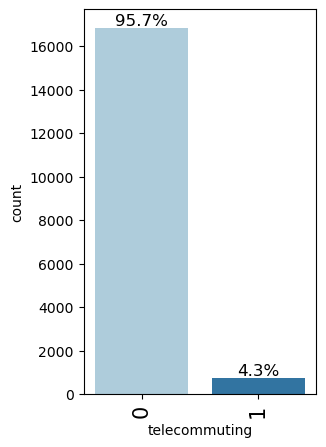

In [49]:
labeled_barplot(df, 'telecommuting', perc=True)

majority are not telecommuting jobs

### Has_company_logo

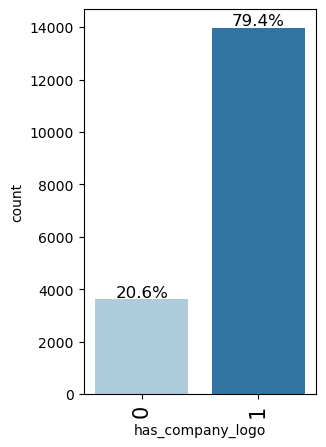

In [52]:
labeled_barplot(df, 'has_company_logo', perc=True)

majority have a company logo

### has_questions

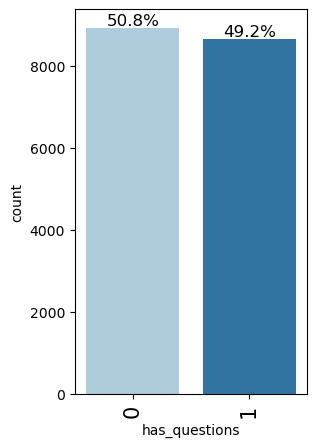

In [55]:
labeled_barplot(df, 'has_questions', perc=True)

rather even split for those with and without questions

### employment_type

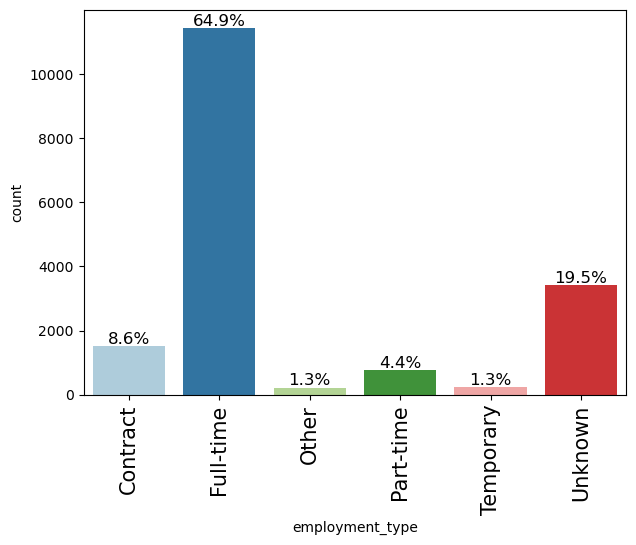

In [58]:
labeled_barplot(df, 'employment_type', perc=True)

full time holds the majority with unkown having the next significant amount

### required_experience

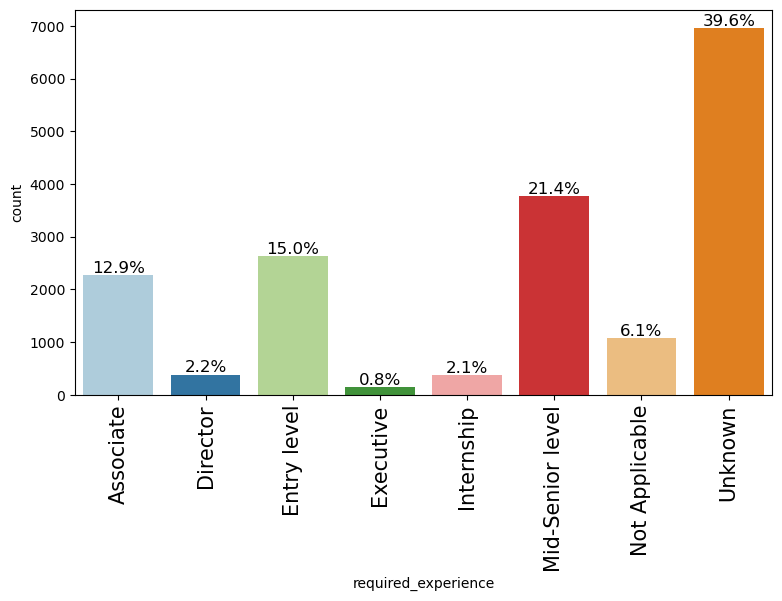

In [61]:
labeled_barplot(df, 'required_experience', perc=True)

majority have unkown experience level with mid-senior level being next

### industry

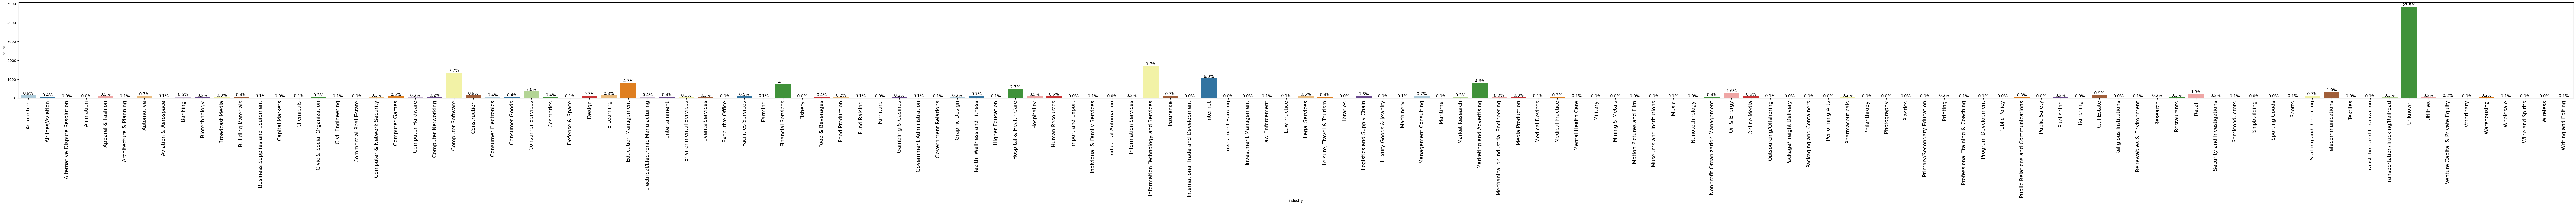

In [64]:
labeled_barplot(df, 'industry', perc=True)

Unkown holds 25 percent of the makeup with the rest having under 10 percent

### function

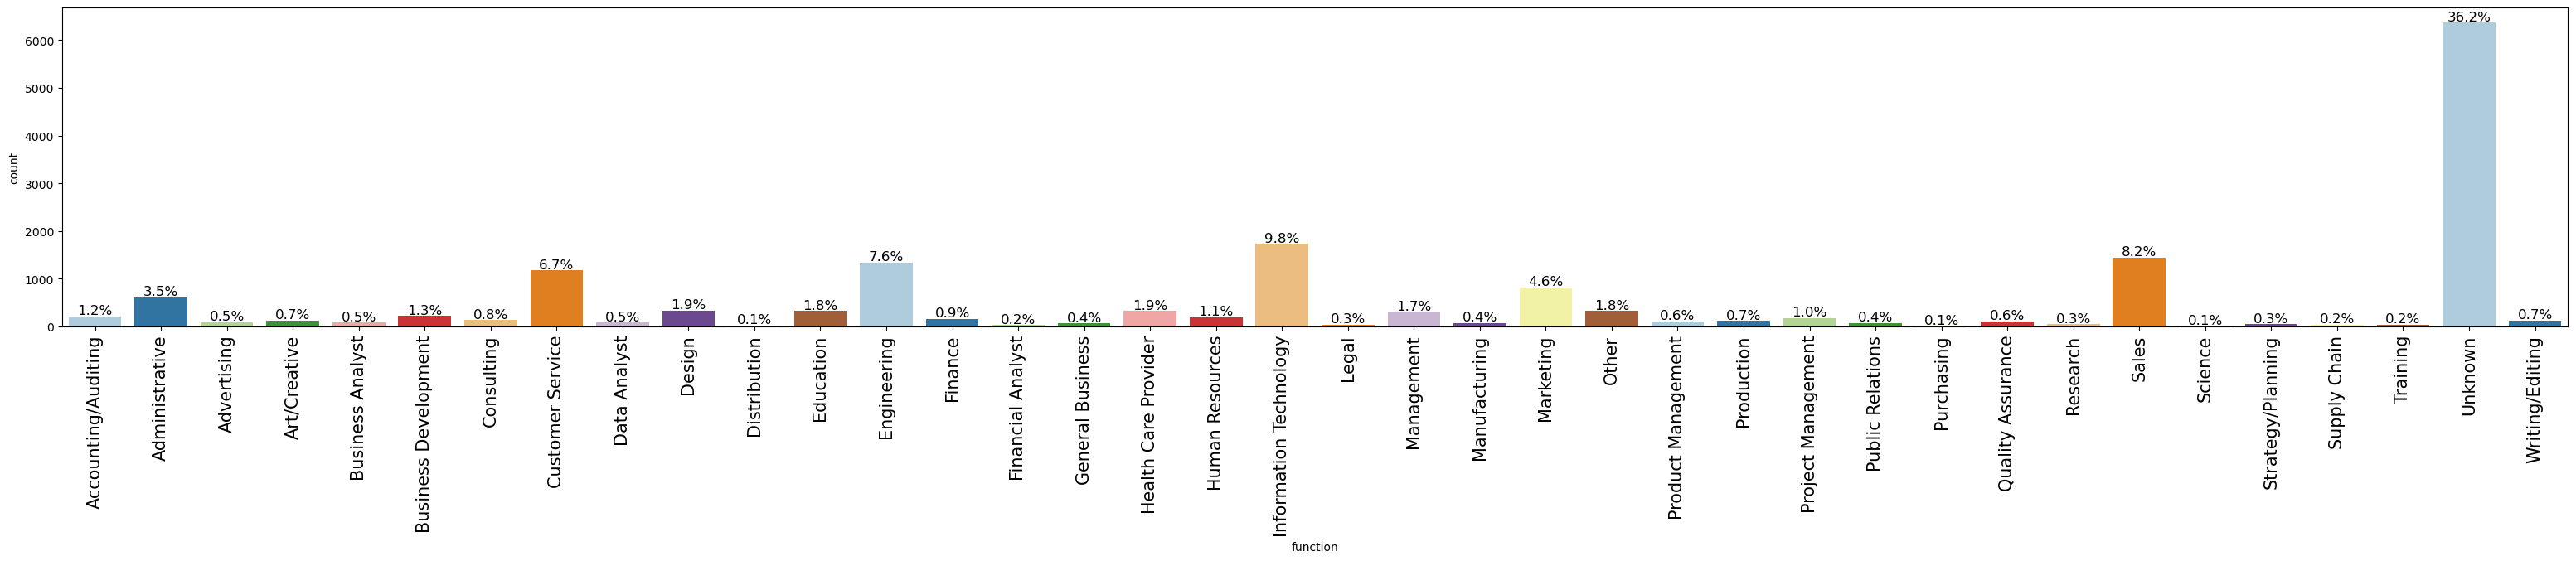

In [67]:
labeled_barplot(df, 'function', perc=True)

Unkown makes up 36 percent with everything else under 10 percent

### fraudulent

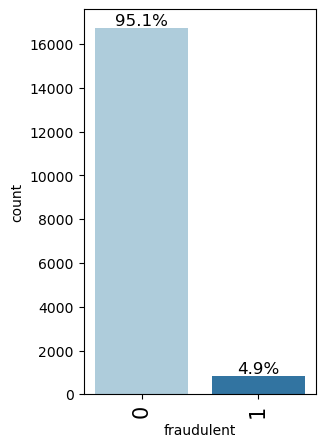

In [70]:
labeled_barplot(df, 'fraudulent', perc=True)

as known majority are not fraudulent

### country

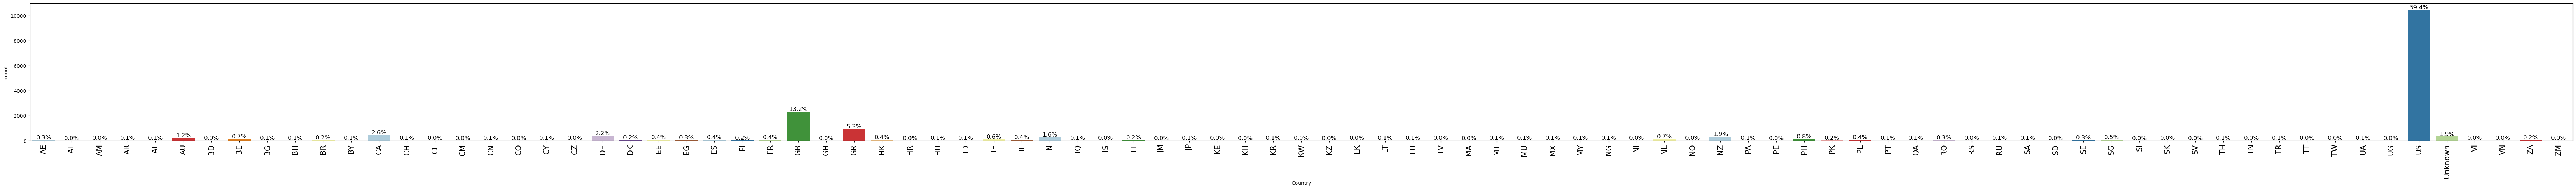

In [73]:
labeled_barplot(df, 'Country', perc=True)

60 percent are US with next largest amount being GB at 13 percent

### state

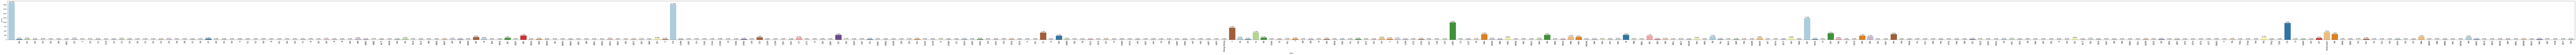

In [76]:
labeled_barplot(df, 'State', perc=True)

In [77]:
df.State.value_counts()

State
       2108
CA     2012
NY     1228
LND     991
TX      957
       ... 
ENF       1
D         1
061       1
82        1
NLE       1
Name: count, Length: 326, dtype: int64

In [78]:
df.loc[df['State'] == '', ['State']] = 'Unknown'

In [79]:
df.State.value_counts()

State
Unknown    2540
CA         2012
NY         1228
LND         991
TX          957
           ... 
ENF           1
D             1
061           1
82            1
NLE           1
Name: count, Length: 325, dtype: int64

majority are unknown with next closest being CA and NY

### City

In [82]:
df.City.value_counts()

City
                          1619
London                    1052
New York                   655
Athens                     541
San Francisco              472
                          ... 
Insch                        1
Council Bluffs               1
Cranberry                    1
Cavite or Alabang area       1
los Angeles                  1
Name: count, Length: 2340, dtype: int64

In [83]:
df.loc[df['City'] == '', ['City']] = 'Unknown'

In [84]:
df.City.value_counts()

City
Unknown                   2051
London                    1052
New York                   655
Athens                     541
San Francisco              472
                          ... 
Insch                        1
Council Bluffs               1
Cranberry                    1
Cavite or Alabang area       1
los Angeles                  1
Name: count, Length: 2339, dtype: int64

Unknown is the largest with London being the next largest distribution

## Multivariate analysis/Extra feature engineering

In [87]:
#Making a text column concantinating all the text information that is in the data set
df['text'] = df['title'] + ' ' + df['location'] + ' ' + df['department'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits'] + ' ' + df['employment_type'] + ' ' + df['required_experience'] + ' ' + df['required_education'] + ' ' + df['industry'] + ' ' + df['function']

In [88]:
#Making function to determine length of text column
def length(x):
    return len(x)

In [89]:
#creating length_text to determine the amount of words in each posting
df['length_text'] = df['text'].apply(length)

In [90]:
df.head()

title            location department  \
0                           Marketing Intern    US, NY, New York  Marketing   
1  Customer Service - Cloud Video Production      NZ, , Auckland    Success   
2    Commissioning Machinery Assistant (CMA)       US, IA, Wever    Unknown   
3          Account Executive - Washington DC  US, DC, Washington      Sales   
4                        Bill Review Manager  US, FL, Fort Worth    Unknown   

  salary_range                                    company_profile  \
0      Unknown  We're Food52, and we've created a groundbreaki...   
1      Unknown  90 Seconds, the worlds Cloud Video Production ...   
2      Unknown  Valor Services provides Workforce Solutions th...   
3      Unknown  Our passion for improving quality of life thro...   
4      Unknown  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                            Unknown              0   
1  What you will get from usThrough being part of...              0   
2                                            Unknown              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  ...  required_experience required_education  \
0                 1  ...           Internship            Unknown   
1                 1  ...       Not Applicable            Unknown   
2                 1  ...              Unknown            Unknown   
3                 1  ...     Mid-Senior level  Bachelor's Degree   
4                 1  ...     Mid-Senior level  Bachelor's Degree   

                    industry              function fraudulent Country  \
0                    Unknown             Marketing          0      US   
1  Marketing and Advertising      Customer Service          0      NZ   
2                    Unknown               Unknown          0      US   
3          Computer Software                 Sales          0      US   
4     Hospital & Health Care  Health Care Provider          0      US   

     State        City                                               text  \
0       NY    New York  Marketing Intern US, NY, New York Marketing We...   
1  Unknown    Auckland  Customer Service - Cloud Video Production NZ, ...   
2       IA       Wever  Commissioning Machinery Assistant (CMA) US, IA...   
3       DC  Washington  Account Executive - Washington DC US, DC, Wash...   
4       FL  Fort Worth  Bill Review Manager US, FL, Fort Worth Unknown...   

  length_text  
0        2739  
1        6232  
2        2709  
3        5556  
4        4065  

[5 rows x 22 columns]

### telecommuting

fraudulent         0    1    All
telecommuting                   
All            16743  856  17599
0              16053  792  16845
1                690   64    754
------------------------------------------------------------------------------------------------------------------------


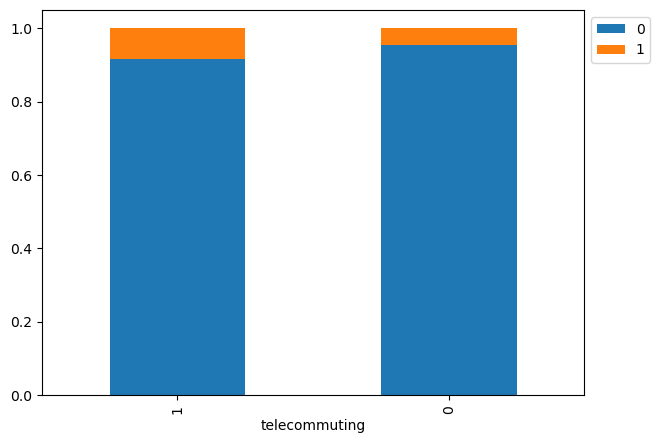

In [92]:
stacked_barplot(df, 'telecommuting', 'fraudulent')

Generally even split between both real and fraudulent

### has_company_logo

fraudulent            0    1    All
has_company_logo                   
All               16743  856  17599
0                  3049  574   3623
1                 13694  282  13976
------------------------------------------------------------------------------------------------------------------------


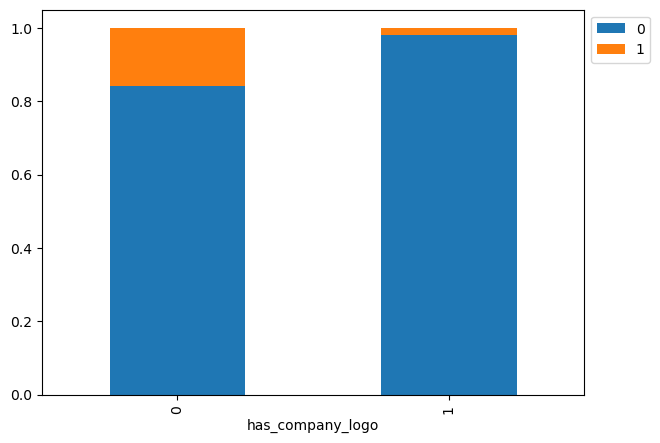

In [95]:
stacked_barplot(df, 'has_company_logo', 'fraudulent')

Barely any fake postings have a company logo

### require_experience

fraudulent               0    1    All
required_experience                   
All                  16743  856  17599
Unknown               6535  427   6962
Entry level           2460  177   2637
Mid-Senior level      3655  113   3768
Not Applicable        1010   60   1070
Associate             2225   42   2267
Director               366   17    383
Executive              130   10    140
Internship             362   10    372
------------------------------------------------------------------------------------------------------------------------


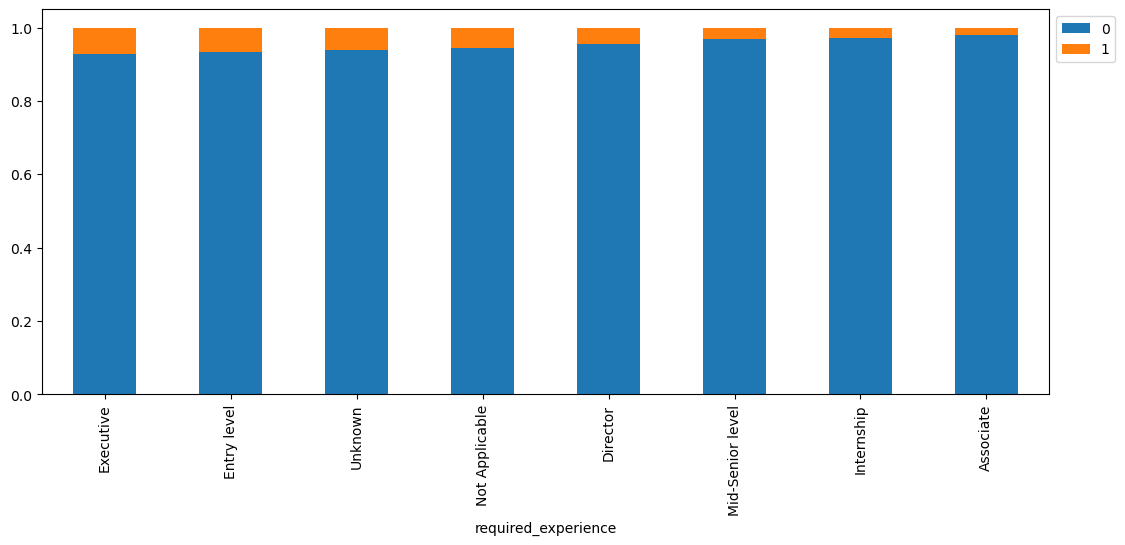

In [98]:
stacked_barplot(df, 'required_experience', 'fraudulent')

Executive, entry level, unkown, and not applicable all have similar distributions for fake and real postings with others being slightly less

### required_education

fraudulent                             0    1    All
required_education                                  
All                                16743  856  17599
Unknown                             7565  444   8009
High School or equivalent           1821  168   1989
Bachelor's Degree                   5000   99   5099
Unspecified                         1308   61   1369
Master's Degree                      385   31    416
Some High School Coursework            7   20     27
Certification                        146   19    165
Associate Degree                     258    6    264
Professional                          69    4     73
Some College Coursework Completed     97    3    100
Doctorate                             25    1     26
Vocational                            47    0     47
Vocational - Degree                    6    0      6
Vocational - HS Diploma                9    0      9
---------------------------------------------------------------------------------------------------

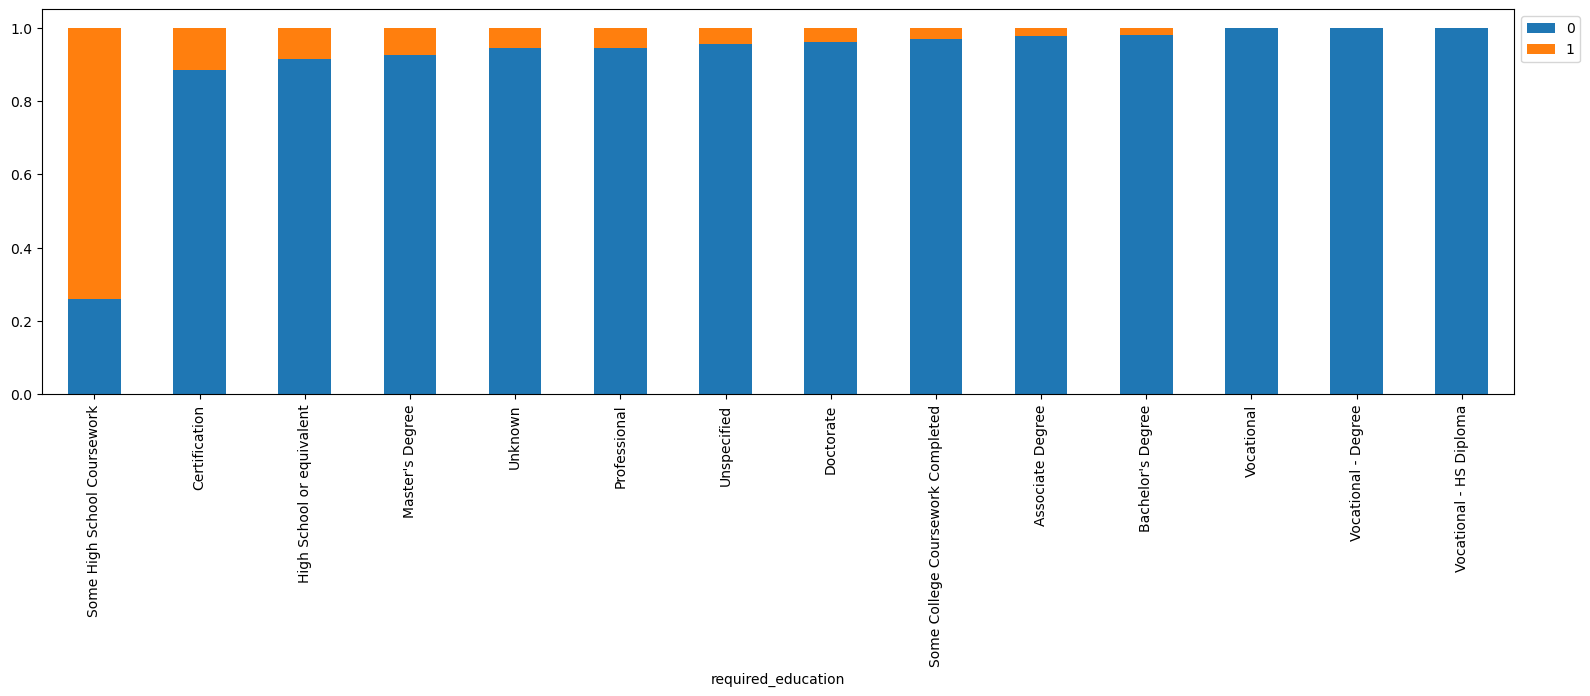

In [101]:
stacked_barplot(df, 'required_education', 'fraudulent')

Some High School coursework are mostly fraudulent. Vocational has non fraudulent

### Industry

fraudulent                               0    1    All
industry                                              
All                                  16743  856  17599
Unknown                               4567  270   4837
Oil & Energy                           178  108    286
Accounting                             102   57    159
Hospital & Health Care                 434   49    483
...                                    ...  ...    ...
Law Enforcement                         10    0     10
Investment Banking                       4    0      4
Internet                              1054    0   1054
International Trade and Development      8    0      8
Legal Services                          96    0     96

[133 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


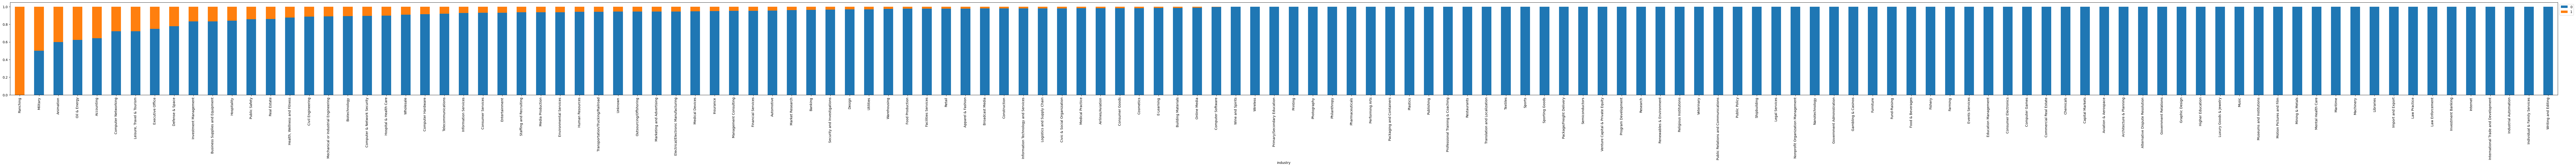

In [104]:
stacked_barplot(df, 'industry', 'fraudulent')

There are a considerable amount with no fraudulent values. Ranching has all fraudulent values

### Function

fraudulent                  0    1    All
function                                 
All                     16743  856  17599
Unknown                  6033  330   6363
Administrative            494  119    613
Engineering              1227  112   1339
Customer Service         1113   67   1180
Sales                    1407   41   1448
Other                     293   32    325
Information Technology   1698   32   1730
Accounting/Auditing       181   29    210
Finance                   150   15    165
Business Development      213   13    226
Project Management        173   10    183
Marketing                 808   10    818
Human Resources           192    9    201
Management                300    6    306
Advertising                85    5     90
Data Analyst               78    4     82
Consulting                134    4    138
Distribution               21    3     24
Design                    333    3    336
Financial Analyst          26    3     29
Manufacturing              71    2

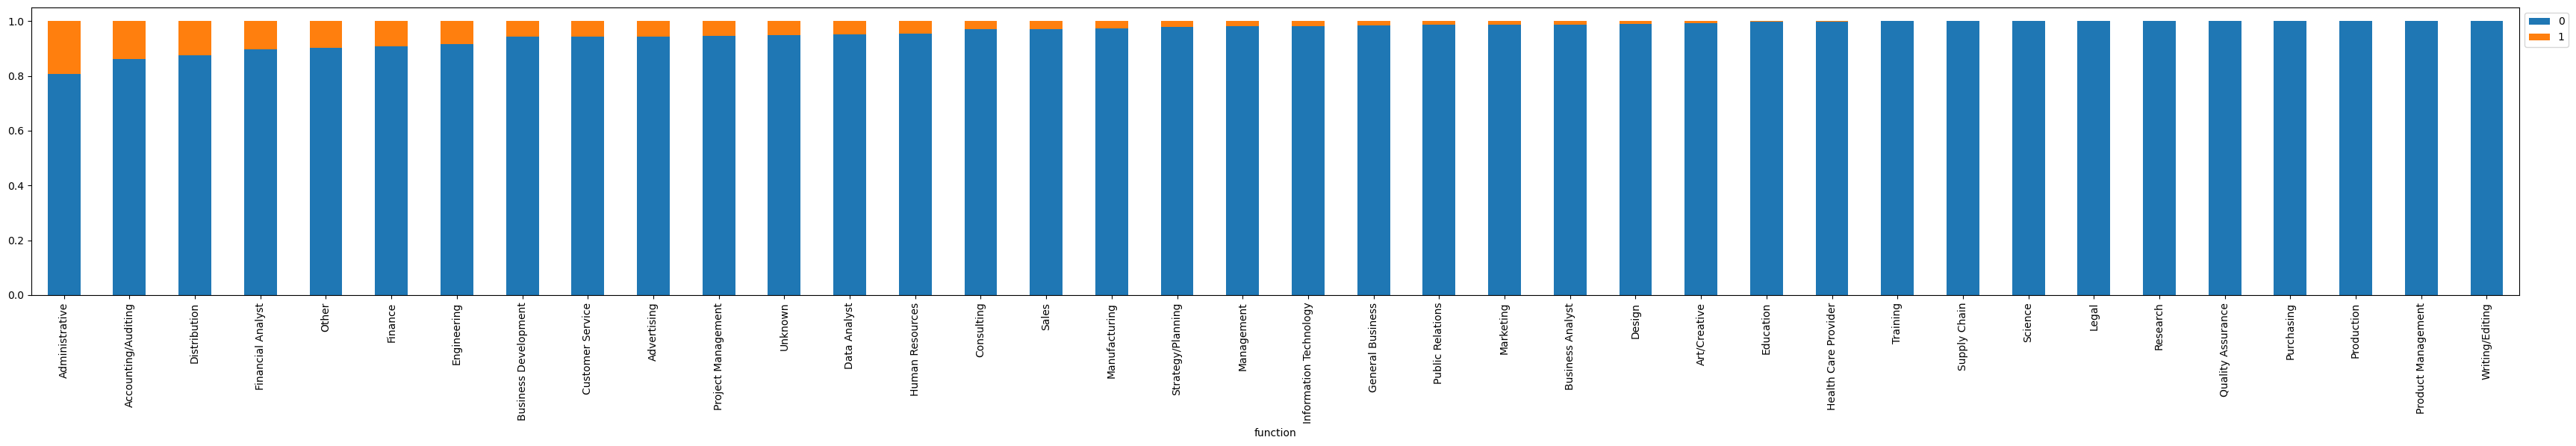

In [107]:
stacked_barplot(df, 'function', 'fraudulent')

Administrative and accounting/auditing have the highest distributions of fraudulent

### Country

fraudulent      0    1    All
Country                      
All         16743  856  17599
US           9739  721  10460
AU            174   39    213
GB           2306   23   2329
Unknown       322   19    341
...           ...  ...    ...
KR             10    0     10
KH              1    0      1
KE              7    0      7
JP             20    0     20
KZ              1    0      1

[92 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


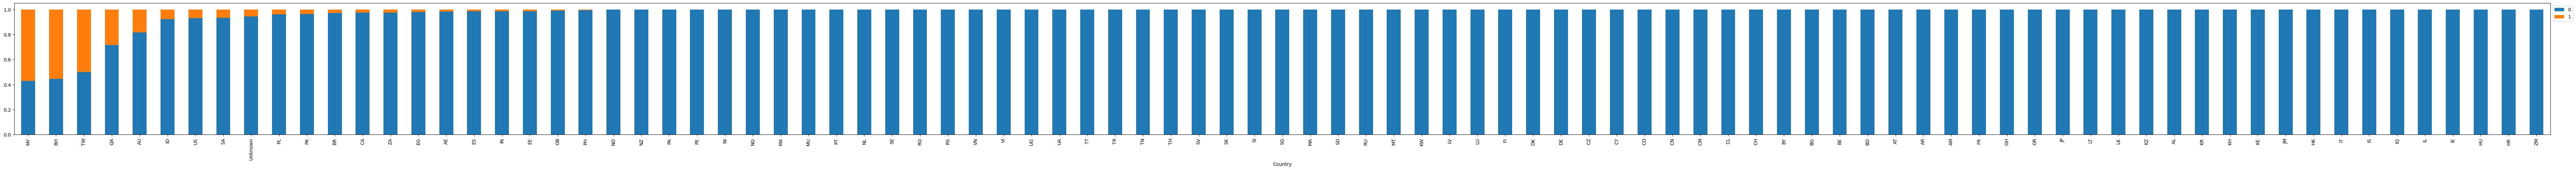

In [110]:
stacked_barplot(df, 'Country', 'fraudulent')

MY, BH, TW, QA, and AU have the highest distribution  of fraudulent postings

### State

fraudulent      0    1    All
State                        
All         16743  856  17599
TX            807  150    957
CA           1869  143   2012
Unknown      2456   84   2540
NY           1160   68   1228
...           ...  ...    ...
EDH            18    0     18
EC              3    0      3
E              17    0     17
DUR             8    0      8
JM              1    0      1

[326 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


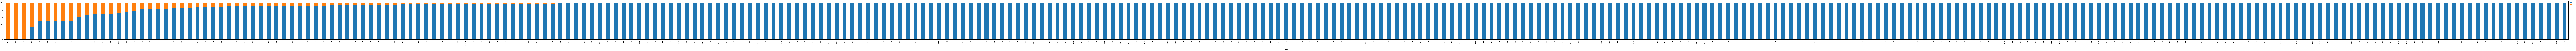

In [113]:
stacked_barplot(df, 'State', 'fraudulent')

ARM, AGB, 16, EAW, LIN, DA, ANS, HI, TPQ all have high distributions of fraudulent postings

### length_text

In [116]:
df['length_text'].describe()

count    17599.000000
mean      2763.563214
std       1465.391397
min        103.000000
25%       1687.000000
50%       2620.000000
75%       3569.000000
max      15037.000000
Name: length_text, dtype: float64

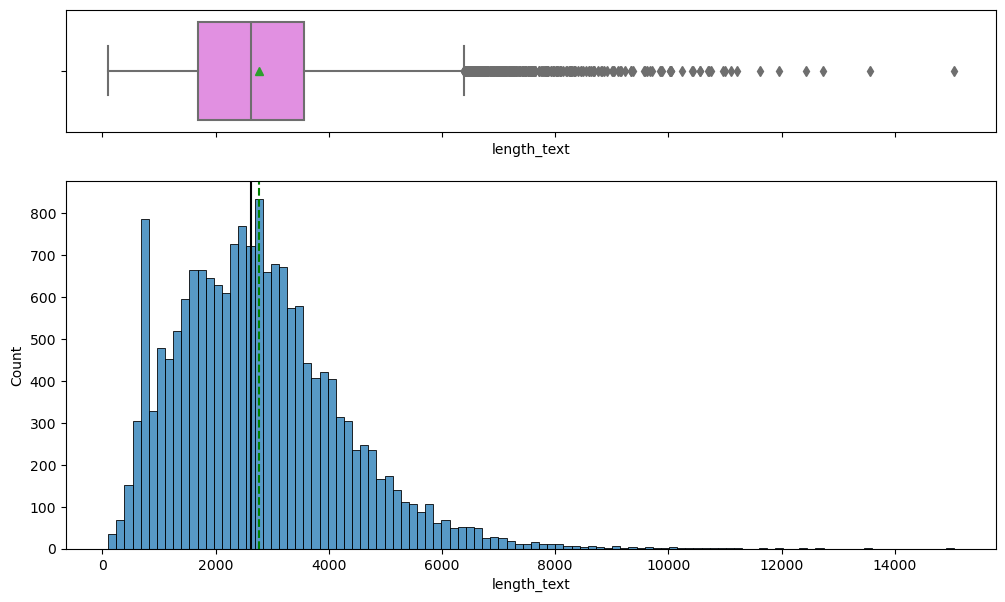

In [117]:
histogram_boxplot(df, 'length_text');

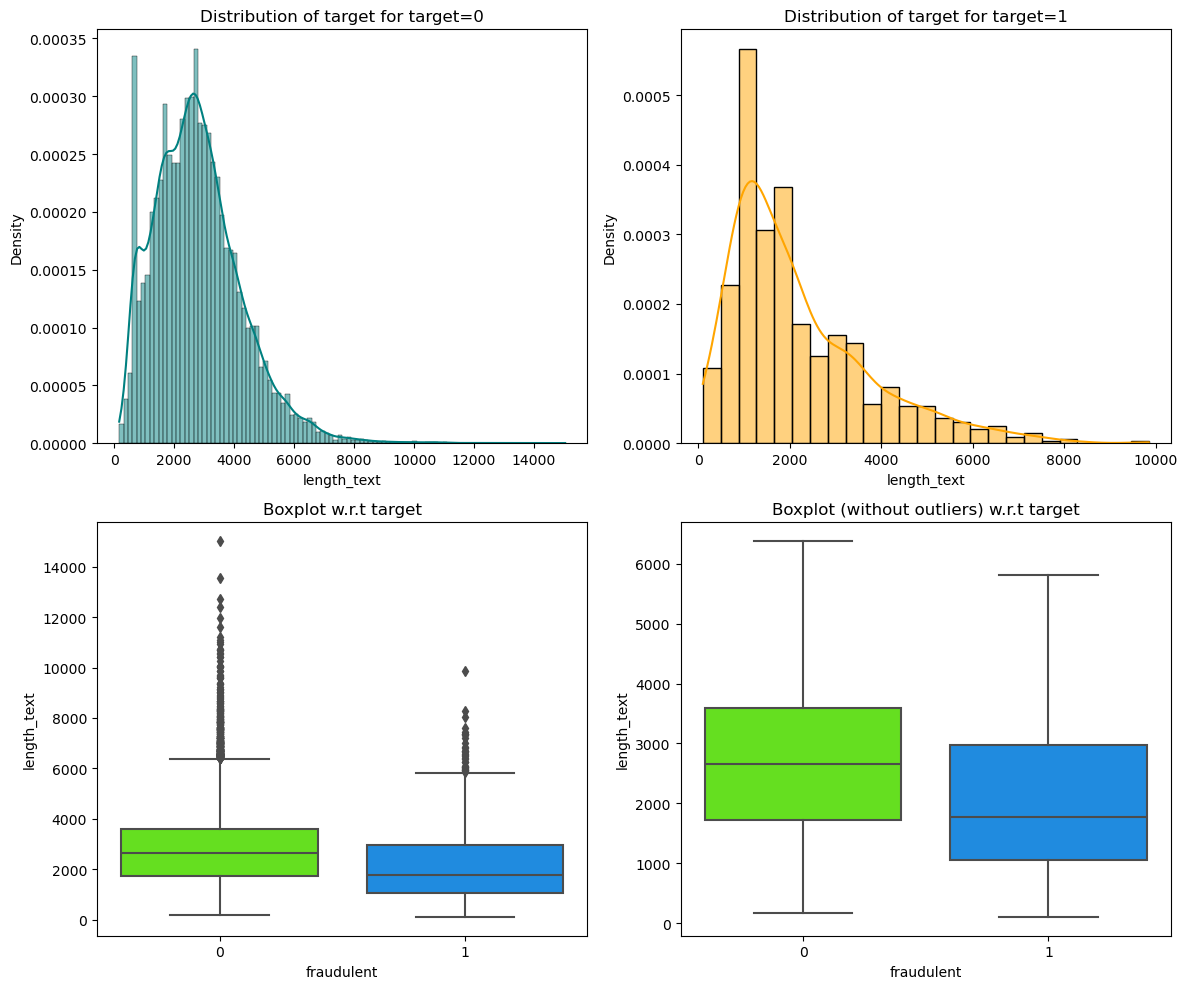

In [118]:
distribution_plot_wrt_target(df, 'length_text', 'fraudulent')

#### Observations

- Real postings has outliers with much higher values
- real postings has a slighlty higher mean and IQR

### Text EDA/Processing/lammentization

#### Removal of contractions

In [122]:
!pip install contractions           #Contraction packge help in expansion of contracted words
import contractions

ERROR: Invalid requirement: '#Contraction'


In [123]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

# Perform the above operation over all the rows of text column of the dataframe.
for i, row in df.iterrows():
    text = df.at[i, 'text']
    clean_text = replace_contractions(text)
    df.at[i,'text'] = clean_text
df.head()

title            location department  \
0                           Marketing Intern    US, NY, New York  Marketing   
1  Customer Service - Cloud Video Production      NZ, , Auckland    Success   
2    Commissioning Machinery Assistant (CMA)       US, IA, Wever    Unknown   
3          Account Executive - Washington DC  US, DC, Washington      Sales   
4                        Bill Review Manager  US, FL, Fort Worth    Unknown   

  salary_range                                    company_profile  \
0      Unknown  We're Food52, and we've created a groundbreaki...   
1      Unknown  90 Seconds, the worlds Cloud Video Production ...   
2      Unknown  Valor Services provides Workforce Solutions th...   
3      Unknown  Our passion for improving quality of life thro...   
4      Unknown  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                            Unknown              0   
1  What you will get from usThrough being part of...              0   
2                                            Unknown              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  ...  required_experience required_education  \
0                 1  ...           Internship            Unknown   
1                 1  ...       Not Applicable            Unknown   
2                 1  ...              Unknown            Unknown   
3                 1  ...     Mid-Senior level  Bachelor's Degree   
4                 1  ...     Mid-Senior level  Bachelor's Degree   

                    industry              function fraudulent Country  \
0                    Unknown             Marketing          0      US   
1  Marketing and Advertising      Customer Service          0      NZ   
2                    Unknown               Unknown          0      US   
3          Computer Software                 Sales          0      US   
4     Hospital & Health Care  Health Care Provider          0      US   

     State        City                                               text  \
0       NY    New York  Marketing Intern US, NY, New York Marketing We...   
1  Unknown    Auckland  Customer Service - Cloud Video Production NZ, ...   
2       IA       Wever  Commissioning Machinery Assistant (CMA) US, IA...   
3       DC  Washington  Account Executive - Washington DC US, DC, Wash...   
4       FL  Fort Worth  Bill Review Manager US, FL, Fort Worth Unknown...   

  length_text  
0        2739  
1        6232  
2        2709  
3        5556  
4        4065  

[5 rows x 22 columns]

In [124]:
 import nltk
 nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\robso\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Removal  of numbers

In [126]:
import re

def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

df['text'] = df['text'].apply(lambda x: remove_numbers(x))
df.head()

title            location department  \
0                           Marketing Intern    US, NY, New York  Marketing   
1  Customer Service - Cloud Video Production      NZ, , Auckland    Success   
2    Commissioning Machinery Assistant (CMA)       US, IA, Wever    Unknown   
3          Account Executive - Washington DC  US, DC, Washington      Sales   
4                        Bill Review Manager  US, FL, Fort Worth    Unknown   

  salary_range                                    company_profile  \
0      Unknown  We're Food52, and we've created a groundbreaki...   
1      Unknown  90 Seconds, the worlds Cloud Video Production ...   
2      Unknown  Valor Services provides Workforce Solutions th...   
3      Unknown  Our passion for improving quality of life thro...   
4      Unknown  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                            Unknown              0   
1  What you will get from usThrough being part of...              0   
2                                            Unknown              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  ...  required_experience required_education  \
0                 1  ...           Internship            Unknown   
1                 1  ...       Not Applicable            Unknown   
2                 1  ...              Unknown            Unknown   
3                 1  ...     Mid-Senior level  Bachelor's Degree   
4                 1  ...     Mid-Senior level  Bachelor's Degree   

                    industry              function fraudulent Country  \
0                    Unknown             Marketing          0      US   
1  Marketing and Advertising      Customer Service          0      NZ   
2                    Unknown               Unknown          0      US   
3          Computer Software                 Sales          0      US   
4     Hospital & Health Care  Health Care Provider          0      US   

     State        City                                               text  \
0       NY    New York  Marketing Intern US, NY, New York Marketing We...   
1  Unknown    Auckland  Customer Service - Cloud Video Production NZ, ...   
2       IA       Wever  Commissioning Machinery Assistant (CMA) US, IA...   
3       DC  Washington  Account Executive - Washington DC US, DC, Wash...   
4       FL  Fort Worth  Bill Review Manager US, FL, Fort Worth Unknown...   

  length_text  
0        2739  
1        6232  
2        2709  
3        5556  
4        4065  

[5 rows x 22 columns]

#### Tokeniation of data

In [128]:
df['text'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
df.head()

title            location department  \
0                           Marketing Intern    US, NY, New York  Marketing   
1  Customer Service - Cloud Video Production      NZ, , Auckland    Success   
2    Commissioning Machinery Assistant (CMA)       US, IA, Wever    Unknown   
3          Account Executive - Washington DC  US, DC, Washington      Sales   
4                        Bill Review Manager  US, FL, Fort Worth    Unknown   

  salary_range                                    company_profile  \
0      Unknown  We're Food52, and we've created a groundbreaki...   
1      Unknown  90 Seconds, the worlds Cloud Video Production ...   
2      Unknown  Valor Services provides Workforce Solutions th...   
3      Unknown  Our passion for improving quality of life thro...   
4      Unknown  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                            Unknown              0   
1  What you will get from usThrough being part of...              0   
2                                            Unknown              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  ...  required_experience required_education  \
0                 1  ...           Internship            Unknown   
1                 1  ...       Not Applicable            Unknown   
2                 1  ...              Unknown            Unknown   
3                 1  ...     Mid-Senior level  Bachelor's Degree   
4                 1  ...     Mid-Senior level  Bachelor's Degree   

                    industry              function fraudulent Country  \
0                    Unknown             Marketing          0      US   
1  Marketing and Advertising      Customer Service          0      NZ   
2                    Unknown               Unknown          0      US   
3          Computer Software                 Sales          0      US   
4     Hospital & Health Care  Health Care Provider          0      US   

     State        City                                               text  \
0       NY    New York  [Marketing, Intern, US, ,, NY, ,, New, York, M...   
1  Unknown    Auckland  [Customer, Service, -, Cloud, Video, Productio...   
2       IA       Wever  [Commissioning, Machinery, Assistant, (, CMA, ...   
3       DC  Washington  [Account, Executive, -, Washington, DC, US, ,,...   
4       FL  Fort Worth  [Bill, Review, Manager, US, ,, FL, ,, Fort, Wo...   

  length_text  
0        2739  
1        6232  
2        2709  
3        5556  
4        4065  

[5 rows x 22 columns]

#### Remove no ASCII characters

In [130]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [131]:
import unicodedata
df['text'] = df['text'].apply(lambda x: remove_non_ascii(x))
df.head()

title            location department  \
0                           Marketing Intern    US, NY, New York  Marketing   
1  Customer Service - Cloud Video Production      NZ, , Auckland    Success   
2    Commissioning Machinery Assistant (CMA)       US, IA, Wever    Unknown   
3          Account Executive - Washington DC  US, DC, Washington      Sales   
4                        Bill Review Manager  US, FL, Fort Worth    Unknown   

  salary_range                                    company_profile  \
0      Unknown  We're Food52, and we've created a groundbreaki...   
1      Unknown  90 Seconds, the worlds Cloud Video Production ...   
2      Unknown  Valor Services provides Workforce Solutions th...   
3      Unknown  Our passion for improving quality of life thro...   
4      Unknown  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                            Unknown              0   
1  What you will get from usThrough being part of...              0   
2                                            Unknown              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  ...  required_experience required_education  \
0                 1  ...           Internship            Unknown   
1                 1  ...       Not Applicable            Unknown   
2                 1  ...              Unknown            Unknown   
3                 1  ...     Mid-Senior level  Bachelor's Degree   
4                 1  ...     Mid-Senior level  Bachelor's Degree   

                    industry              function fraudulent Country  \
0                    Unknown             Marketing          0      US   
1  Marketing and Advertising      Customer Service          0      NZ   
2                    Unknown               Unknown          0      US   
3          Computer Software                 Sales          0      US   
4     Hospital & Health Care  Health Care Provider          0      US   

     State        City                                               text  \
0       NY    New York  [Marketing, Intern, US, ,, NY, ,, New, York, M...   
1  Unknown    Auckland  [Customer, Service, -, Cloud, Video, Productio...   
2       IA       Wever  [Commissioning, Machinery, Assistant, (, CMA, ...   
3       DC  Washington  [Account, Executive, -, Washington, DC, US, ,,...   
4       FL  Fort Worth  [Bill, Review, Manager, US, ,, FL, ,, Fort, Wo...   

  length_text  
0        2739  
1        6232  
2        2709  
3        5556  
4        4065  

[5 rows x 22 columns]

#### Turning text into lowercase

In [133]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [134]:
df['text'] = df['text'].apply(lambda x: to_lowercase(x))
df.head()

title            location department  \
0                           Marketing Intern    US, NY, New York  Marketing   
1  Customer Service - Cloud Video Production      NZ, , Auckland    Success   
2    Commissioning Machinery Assistant (CMA)       US, IA, Wever    Unknown   
3          Account Executive - Washington DC  US, DC, Washington      Sales   
4                        Bill Review Manager  US, FL, Fort Worth    Unknown   

  salary_range                                    company_profile  \
0      Unknown  We're Food52, and we've created a groundbreaki...   
1      Unknown  90 Seconds, the worlds Cloud Video Production ...   
2      Unknown  Valor Services provides Workforce Solutions th...   
3      Unknown  Our passion for improving quality of life thro...   
4      Unknown  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                            Unknown              0   
1  What you will get from usThrough being part of...              0   
2                                            Unknown              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  ...  required_experience required_education  \
0                 1  ...           Internship            Unknown   
1                 1  ...       Not Applicable            Unknown   
2                 1  ...              Unknown            Unknown   
3                 1  ...     Mid-Senior level  Bachelor's Degree   
4                 1  ...     Mid-Senior level  Bachelor's Degree   

                    industry              function fraudulent Country  \
0                    Unknown             Marketing          0      US   
1  Marketing and Advertising      Customer Service          0      NZ   
2                    Unknown               Unknown          0      US   
3          Computer Software                 Sales          0      US   
4     Hospital & Health Care  Health Care Provider          0      US   

     State        City                                               text  \
0       NY    New York  [marketing, intern, us, ,, ny, ,, new, york, m...   
1  Unknown    Auckland  [customer, service, -, cloud, video, productio...   
2       IA       Wever  [commissioning, machinery, assistant, (, cma, ...   
3       DC  Washington  [account, executive, -, washington, dc, us, ,,...   
4       FL  Fort Worth  [bill, review, manager, us, ,, fl, ,, fort, wo...   

  length_text  
0        2739  
1        6232  
2        2709  
3        5556  
4        4065  

[5 rows x 22 columns]

#### Removing Punctuation

In [136]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words

In [137]:
df['text'] = df['text'].apply(lambda x: remove_punctuation(x))
df.head()

title            location department  \
0                           Marketing Intern    US, NY, New York  Marketing   
1  Customer Service - Cloud Video Production      NZ, , Auckland    Success   
2    Commissioning Machinery Assistant (CMA)       US, IA, Wever    Unknown   
3          Account Executive - Washington DC  US, DC, Washington      Sales   
4                        Bill Review Manager  US, FL, Fort Worth    Unknown   

  salary_range                                    company_profile  \
0      Unknown  We're Food52, and we've created a groundbreaki...   
1      Unknown  90 Seconds, the worlds Cloud Video Production ...   
2      Unknown  Valor Services provides Workforce Solutions th...   
3      Unknown  Our passion for improving quality of life thro...   
4      Unknown  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                            Unknown              0   
1  What you will get from usThrough being part of...              0   
2                                            Unknown              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  ...  required_experience required_education  \
0                 1  ...           Internship            Unknown   
1                 1  ...       Not Applicable            Unknown   
2                 1  ...              Unknown            Unknown   
3                 1  ...     Mid-Senior level  Bachelor's Degree   
4                 1  ...     Mid-Senior level  Bachelor's Degree   

                    industry              function fraudulent Country  \
0                    Unknown             Marketing          0      US   
1  Marketing and Advertising      Customer Service          0      NZ   
2                    Unknown               Unknown          0      US   
3          Computer Software                 Sales          0      US   
4     Hospital & Health Care  Health Care Provider          0      US   

     State        City                                               text  \
0       NY    New York  [marketing, intern, us, ny, new, york, marketi...   
1  Unknown    Auckland  [customer, service, cloud, video, production, ...   
2       IA       Wever  [commissioning, machinery, assistant, cma, us,...   
3       DC  Washington  [account, executive, washington, dc, us, dc, w...   
4       FL  Fort Worth  [bill, review, manager, us, fl, fort, worth, u...   

  length_text  
0        2739  
1        6232  
2        2709  
3        5556  
4        4065  

[5 rows x 22 columns]

#### Removing stop words

In [139]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')  # Download the stopwords corpus if you haven't already

# Get the English stopwords list
stopwords_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\robso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [140]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        if word not in stopwords_list:
            new_words.append(word)        # Append processed words to new list.
    return new_words

In [141]:
df['text'] = df['text'].apply(lambda x: remove_stopwords(x))
df.head()

title            location department  \
0                           Marketing Intern    US, NY, New York  Marketing   
1  Customer Service - Cloud Video Production      NZ, , Auckland    Success   
2    Commissioning Machinery Assistant (CMA)       US, IA, Wever    Unknown   
3          Account Executive - Washington DC  US, DC, Washington      Sales   
4                        Bill Review Manager  US, FL, Fort Worth    Unknown   

  salary_range                                    company_profile  \
0      Unknown  We're Food52, and we've created a groundbreaki...   
1      Unknown  90 Seconds, the worlds Cloud Video Production ...   
2      Unknown  Valor Services provides Workforce Solutions th...   
3      Unknown  Our passion for improving quality of life thro...   
4      Unknown  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                            Unknown              0   
1  What you will get from usThrough being part of...              0   
2                                            Unknown              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  ...  required_experience required_education  \
0                 1  ...           Internship            Unknown   
1                 1  ...       Not Applicable            Unknown   
2                 1  ...              Unknown            Unknown   
3                 1  ...     Mid-Senior level  Bachelor's Degree   
4                 1  ...     Mid-Senior level  Bachelor's Degree   

                    industry              function fraudulent Country  \
0                    Unknown             Marketing          0      US   
1  Marketing and Advertising      Customer Service          0      NZ   
2                    Unknown               Unknown          0      US   
3          Computer Software                 Sales          0      US   
4     Hospital & Health Care  Health Care Provider          0      US   

     State        City                                               text  \
0       NY    New York  [marketing, intern, us, ny, new, york, marketi...   
1  Unknown    Auckland  [customer, service, cloud, video, production, ...   
2       IA       Wever  [commissioning, machinery, assistant, cma, us,...   
3       DC  Washington  [account, executive, washington, dc, us, dc, w...   
4       FL  Fort Worth  [bill, review, manager, us, fl, fort, worth, u...   

  length_text  
0        2739  
1        6232  
2        2709  
3        5556  
4        4065  

[5 rows x 22 columns]

#### Lemmatization

In [143]:
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

In [144]:
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\robso\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [145]:
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word))
    return new_words

In [146]:
df['text'] = df['text'].apply(lambda x: lemmatize_list(x))
df.head()

title            location department  \
0                           Marketing Intern    US, NY, New York  Marketing   
1  Customer Service - Cloud Video Production      NZ, , Auckland    Success   
2    Commissioning Machinery Assistant (CMA)       US, IA, Wever    Unknown   
3          Account Executive - Washington DC  US, DC, Washington      Sales   
4                        Bill Review Manager  US, FL, Fort Worth    Unknown   

  salary_range                                    company_profile  \
0      Unknown  We're Food52, and we've created a groundbreaki...   
1      Unknown  90 Seconds, the worlds Cloud Video Production ...   
2      Unknown  Valor Services provides Workforce Solutions th...   
3      Unknown  Our passion for improving quality of life thro...   
4      Unknown  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                            Unknown              0   
1  What you will get from usThrough being part of...              0   
2                                            Unknown              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  ...  required_experience required_education  \
0                 1  ...           Internship            Unknown   
1                 1  ...       Not Applicable            Unknown   
2                 1  ...              Unknown            Unknown   
3                 1  ...     Mid-Senior level  Bachelor's Degree   
4                 1  ...     Mid-Senior level  Bachelor's Degree   

                    industry              function fraudulent Country  \
0                    Unknown             Marketing          0      US   
1  Marketing and Advertising      Customer Service          0      NZ   
2                    Unknown               Unknown          0      US   
3          Computer Software                 Sales          0      US   
4     Hospital & Health Care  Health Care Provider          0      US   

     State        City                                               text  \
0       NY    New York  [marketing, intern, u, ny, new, york, marketin...   
1  Unknown    Auckland  [customer, service, cloud, video, production, ...   
2       IA       Wever  [commissioning, machinery, assistant, cma, u, ...   
3       DC  Washington  [account, executive, washington, dc, u, dc, wa...   
4       FL  Fort Worth  [bill, review, manager, u, fl, fort, worth, un...   

  length_text  
0        2739  
1        6232  
2        2709  
3        5556  
4        4065  

[5 rows x 22 columns]

In [147]:
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

df['text'] = df.apply(lambda row: normalize(row['text']), axis=1)
df.head()

title            location department  \
0                           Marketing Intern    US, NY, New York  Marketing   
1  Customer Service - Cloud Video Production      NZ, , Auckland    Success   
2    Commissioning Machinery Assistant (CMA)       US, IA, Wever    Unknown   
3          Account Executive - Washington DC  US, DC, Washington      Sales   
4                        Bill Review Manager  US, FL, Fort Worth    Unknown   

  salary_range                                    company_profile  \
0      Unknown  We're Food52, and we've created a groundbreaki...   
1      Unknown  90 Seconds, the worlds Cloud Video Production ...   
2      Unknown  Valor Services provides Workforce Solutions th...   
3      Unknown  Our passion for improving quality of life thro...   
4      Unknown  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                            Unknown              0   
1  What you will get from usThrough being part of...              0   
2                                            Unknown              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  ...  required_experience required_education  \
0                 1  ...           Internship            Unknown   
1                 1  ...       Not Applicable            Unknown   
2                 1  ...              Unknown            Unknown   
3                 1  ...     Mid-Senior level  Bachelor's Degree   
4                 1  ...     Mid-Senior level  Bachelor's Degree   

                    industry              function fraudulent Country  \
0                    Unknown             Marketing          0      US   
1  Marketing and Advertising      Customer Service          0      NZ   
2                    Unknown               Unknown          0      US   
3          Computer Software                 Sales          0      US   
4     Hospital & Health Care  Health Care Provider          0      US   

     State        City                                               text  \
0       NY    New York  marketing intern u ny new york marketing food ...   
1  Unknown    Auckland  customer service cloud video production nz auc...   
2       IA       Wever  commissioning machinery assistant cma u ia wev...   
3       DC  Washington  account executive washington dc u dc washingto...   
4       FL  Fort Worth  bill review manager u fl fort worth unknown sp...   

  length_text  
0        2739  
1        6232  
2        2709  
3        5556  
4        4065  

[5 rows x 22 columns]

#### Wordcounters

<b>Words in text with highest counts<b>

In [150]:

from collections import Counter

df['text'] = df['text'].astype(str)
df['text'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

# Count the frequency of words
top = Counter([item for sublist in df['text'] for item in sublist])
freq = pd.DataFrame(top.most_common(20))
freq.columns = ['Common_words', 'count']
freq.style.background_gradient(cmap='Reds')

In [151]:
fraudpostings = df[df['fraudulent']== 1]
realpostings = df[df['fraudulent']== 0]

<b> Most common words in fraudulent postings<b>

In [153]:
#MosT common fraudpostings
top = Counter([item for sublist in fraudpostings['text'] for item in sublist])
freq_fraud = pd.DataFrame(top.most_common(20))
freq_fraud.columns = ['Common_words','count']
freq_fraud.style.background_gradient(cmap='Greens')

<b> Most common words in real postings <b>

In [155]:
#MosT common realpostings
top = Counter([item for sublist in realpostings['text'] for item in sublist])
freq_fraud = pd.DataFrame(top.most_common(20))
freq_fraud.columns = ['Common_words','count']
freq_fraud.style.background_gradient(cmap='ocean')

Observations:
- Similar words thorughout both real and fake postings such as: Unknown, experience, work, and service
- Some words in fake postings that are not in real as often: position, project, engineering, system, time, level

#### Wordcloud

In [158]:
import wordcloud
def show_wordcloud(fraudpostings, title):
    text = ' '.join(fraudpostings['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

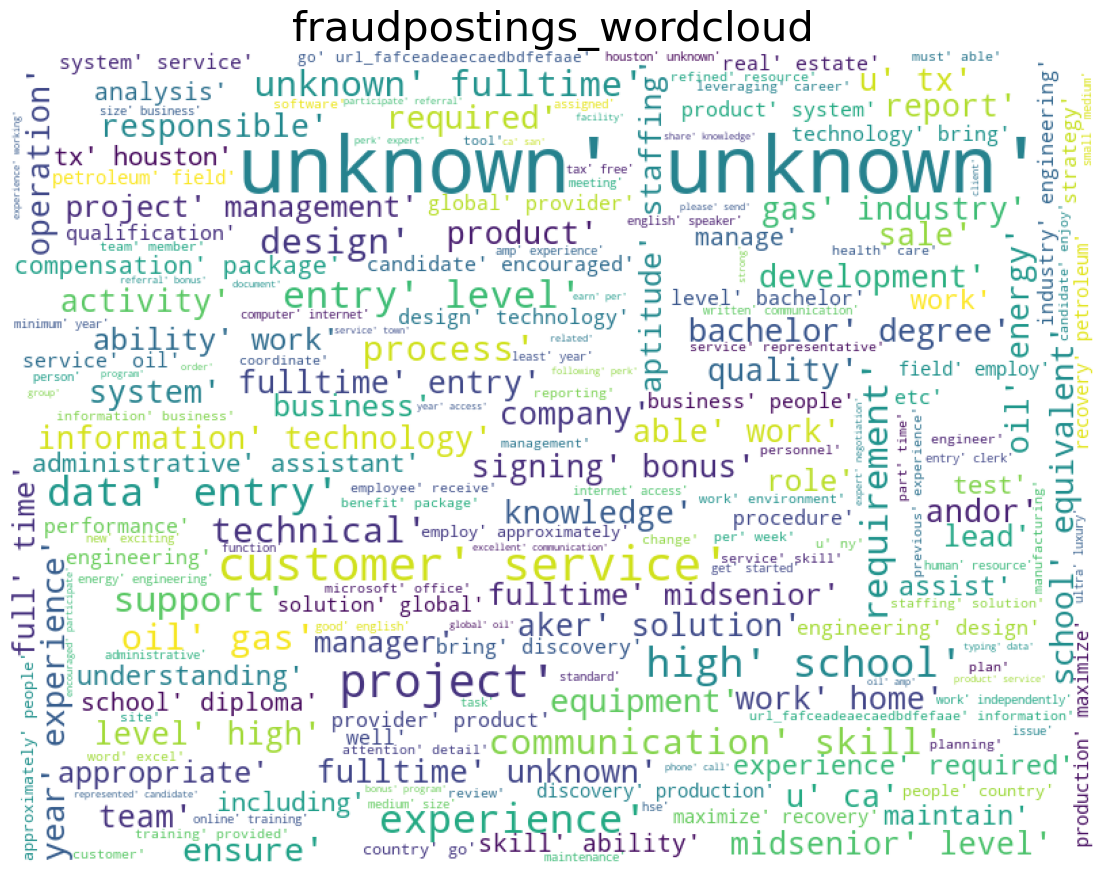

In [159]:
show_wordcloud(fraudpostings, "fraudpostings_wordcloud")

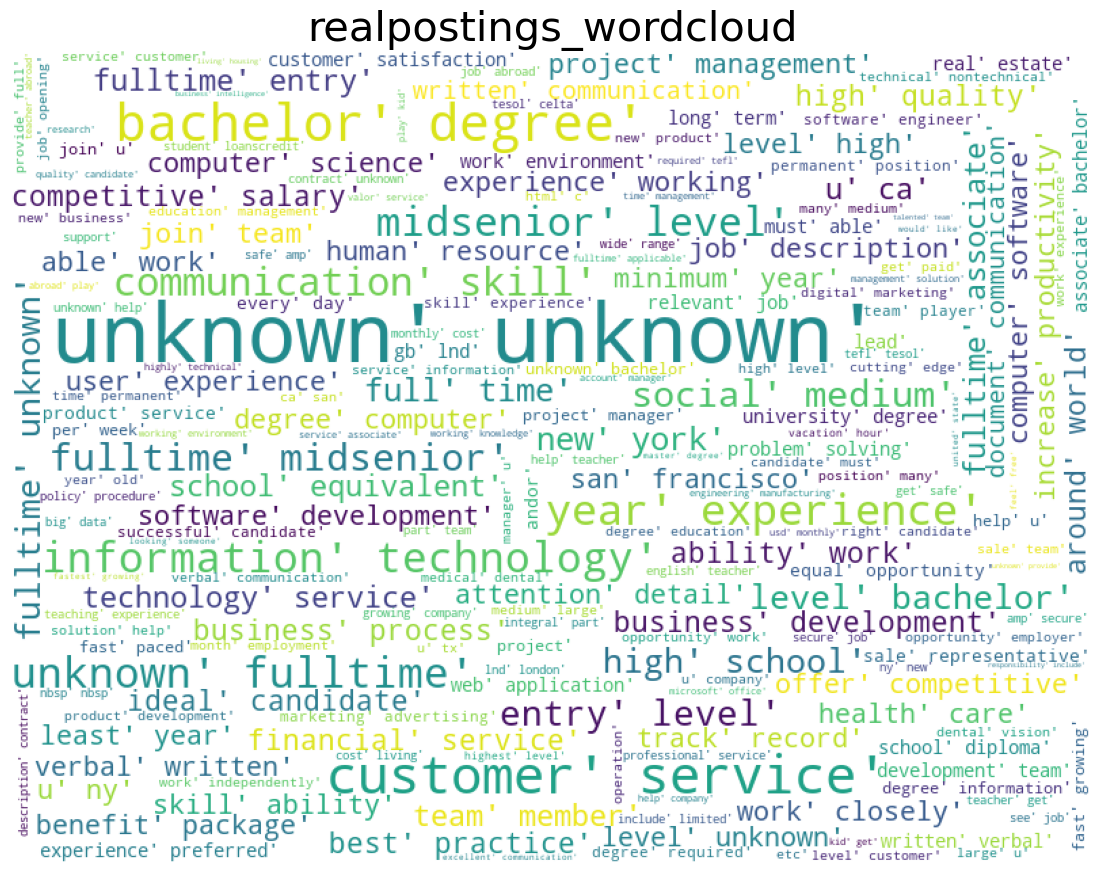

In [160]:
show_wordcloud(realpostings, "realpostings_wordcloud")

##### Observations:
- Bachelor degree is seen larger in real postings
- Customer service is large in both
- Entry level is larger in fake postings
- High school is larger in fake postings

## Feature engineering/Dataprep

In [163]:
df.head()

title            location department  \
0                           Marketing Intern    US, NY, New York  Marketing   
1  Customer Service - Cloud Video Production      NZ, , Auckland    Success   
2    Commissioning Machinery Assistant (CMA)       US, IA, Wever    Unknown   
3          Account Executive - Washington DC  US, DC, Washington      Sales   
4                        Bill Review Manager  US, FL, Fort Worth    Unknown   

  salary_range                                    company_profile  \
0      Unknown  We're Food52, and we've created a groundbreaki...   
1      Unknown  90 Seconds, the worlds Cloud Video Production ...   
2      Unknown  Valor Services provides Workforce Solutions th...   
3      Unknown  Our passion for improving quality of life thro...   
4      Unknown  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                            Unknown              0   
1  What you will get from usThrough being part of...              0   
2                                            Unknown              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  ...  required_experience required_education  \
0                 1  ...           Internship            Unknown   
1                 1  ...       Not Applicable            Unknown   
2                 1  ...              Unknown            Unknown   
3                 1  ...     Mid-Senior level  Bachelor's Degree   
4                 1  ...     Mid-Senior level  Bachelor's Degree   

                    industry              function fraudulent Country  \
0                    Unknown             Marketing          0      US   
1  Marketing and Advertising      Customer Service          0      NZ   
2                    Unknown               Unknown          0      US   
3          Computer Software                 Sales          0      US   
4     Hospital & Health Care  Health Care Provider          0      US   

     State        City                                               text  \
0       NY    New York  [marketing, intern, u, ny, new, york, marketin...   
1  Unknown    Auckland  [customer, service, cloud, video, production, ...   
2       IA       Wever  [commissioning, machinery, assistant, cma, u, ...   
3       DC  Washington  [account, executive, washington, dc, u, dc, wa...   
4       FL  Fort Worth  [bill, review, manager, u, fl, fort, worth, un...   

  length_text  
0        2739  
1        6232  
2        2709  
3        5556  
4        4065  

[5 rows x 22 columns]

In [164]:
# Dropping text columns that have large amounts of different variables and will be vectorized in the 'text' feature
df = df.drop(['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'Country', 'State', 'City'], axis=1)

In [165]:
df.head()

telecommuting  has_company_logo  has_questions employment_type  \
0              0                 1              0           Other   
1              0                 1              0       Full-time   
2              0                 1              0         Unknown   
3              0                 1              0       Full-time   
4              0                 1              1       Full-time   

  required_experience required_education                   industry  \
0          Internship            Unknown                    Unknown   
1      Not Applicable            Unknown  Marketing and Advertising   
2             Unknown            Unknown                    Unknown   
3    Mid-Senior level  Bachelor's Degree          Computer Software   
4    Mid-Senior level  Bachelor's Degree     Hospital & Health Care   

               function  fraudulent  \
0             Marketing           0   
1      Customer Service           0   
2               Unknown           0   
3                 Sales           0   
4  Health Care Provider           0   

                                                text  length_text  
0  [marketing, intern, u, ny, new, york, marketin...         2739  
1  [customer, service, cloud, video, production, ...         6232  
2  [commissioning, machinery, assistant, cma, u, ...         2709  
3  [account, executive, washington, dc, u, dc, wa...         5556  
4  [bill, review, manager, u, fl, fort, worth, un...         4065

<b>Label encoding: employment_type, required_experience, required_education, industry, and function <b>

In [167]:
# Label Encoding enrolled_university
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['employment_type'] = label_encoder.fit_transform(df['employment_type'])
df['required_experience'] = label_encoder.fit_transform(df['required_experience'])
df['required_education'] = label_encoder.fit_transform(df['required_education'])
df['industry'] = label_encoder.fit_transform(df['industry'])
df['function'] = label_encoder.fit_transform(df['function'])

df.head()

telecommuting  has_company_logo  has_questions  employment_type  \
0              0                 1              0                2   
1              0                 1              0                1   
2              0                 1              0                5   
3              0                 1              0                1   
4              0                 1              1                1   

   required_experience  required_education  industry  function  fraudulent  \
0                    4                   9       123        22           0   
1                    6                   9        75         7           0   
2                    7                   9       123        36           0   
3                    5                   1        22        31           0   
4                    5                   1        51        16           0   

                                                text  length_text  
0  [marketing, intern, u, ny, new, york, marketin...         2739  
1  [customer, service, cloud, video, production, ...         6232  
2  [commissioning, machinery, assistant, cma, u, ...         2709  
3  [account, executive, washington, dc, u, dc, wa...         5556  
4  [bill, review, manager, u, fl, fort, worth, un...         4065

<b>Scaling length_text<b>

In [169]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[['length_text']])
df[['length_text']] = scaler.transform(df[['length_text']])

## Summary

- Removed Job ID
- Made Country, State, City columns
- Made concantination of text columns
- Made a text length column to analyze if fraudlent postings were longer or shorter on average
- Normalized the text column
- Analzed word counts for fraudulent and real postings
- Made wordclouds for fraudulent and real postings
- Analyzed relationships beetween variables and fraudulent postings

## Random Forrest

In [172]:
#vectorizing
df["text"] = df["text"].astype(pd.StringDtype())
text2 = df['text'].map(' '.join)
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer
bow_vec = CountVectorizer(max_features=2000)                # Keep only 2000 features as number of features will increase the processing time.
data_features = bow_vec.fit_transform(df['text'])
data_features = data_features.toarray()                        # Convert the data features to arra

In [173]:
data_features.shape

(17599, 2000)

In [174]:
label = df['fraudulent']
label = [0 if sent==0 else 1 if sent==1 else 2 for sent in label]

In [175]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, label, test_size=0.3, random_state=42)

In [176]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=50, n_jobs=5)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, label, cv=10)))

RandomForestClassifier(n_estimators=50, n_jobs=5)
0.9765890033076644


In [177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=50, n_jobs=5)

forest = forest.fit(X_test, y_test)

print(forest)

print(np.mean(cross_val_score(forest, data_features, label, cv=10)))

RandomForestClassifier(n_estimators=50, n_jobs=5)
0.9772711122021809


In [178]:
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [179]:
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

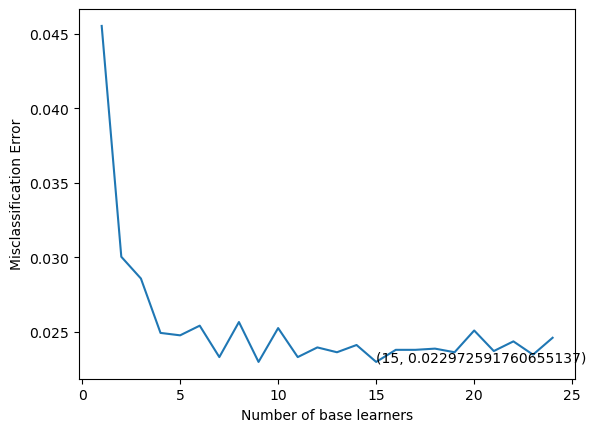

In [180]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [181]:
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9768939393939394

In [182]:
result = clf.predict(X_test)

          Negative  Positive
Negative      5013         2
Positive       120       145
0.9768939393939394


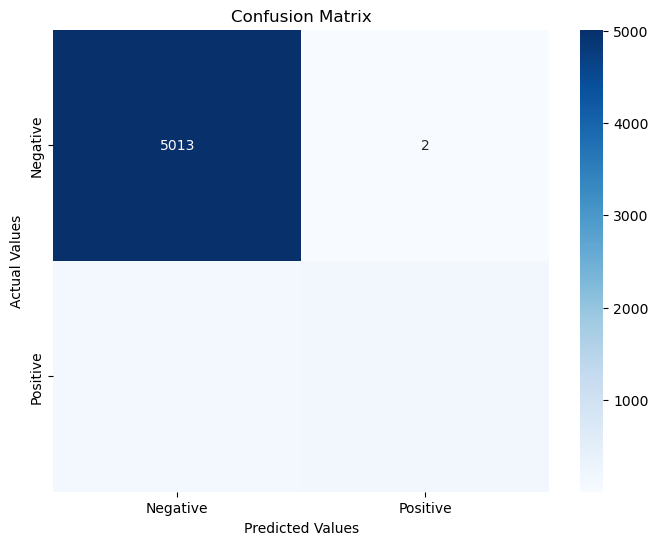

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

conf_mat = pd.DataFrame(conf_mat,
                     index = ['Negative','Positive'],
                     columns = ['Negative','Positive'])

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

## Pipeline method

In [185]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier

In [186]:
text_clf_SGD = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('clf',SGDClassifier(loss="hinge",class_weight="balanced",random_state=0)),])

In [187]:
X = df.drop(['fraudulent'], axis=1)
y = df['fraudulent']

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [189]:
text_clf_SGD.fit(X_train["text"].values, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(class_weight='balanced', random_state=0))])

In [190]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predicted = text_clf_SGD.predict(X_test["text"].values)


test_accuracy_pipeline = accuracy_score(y_test, predicted)
test_precision_pipeline = precision_score(y_test, predicted)
test_recall_pipeline = recall_score(y_test, predicted)
test_f1_pipeline = f1_score(y_test, predicted)

print("Accuracy:", test_accuracy_pipeline)
print("Precision:", test_precision_pipeline)
print("Recall:", test_recall_pipeline)
print("F1 Score:", test_f1_pipeline)

Accuracy: 0.9831439393939394
Precision: 0.8129770992366412
Recall: 0.841897233201581
F1 Score: 0.8271844660194175


In [191]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predicted = text_clf_SGD.predict(X_train["text"].values)


train_accuracy_pipeline = accuracy_score(y_train, predicted)
train_precision_pipeline = precision_score(y_train, predicted)
train_recall_pipeline = recall_score(y_train, predicted)
train_f1_pipeline = f1_score(y_train, predicted)

print("Accuracy:", train_accuracy_pipeline)
print("Precision:", train_precision_pipeline)
print("Recall:", train_recall_pipeline)
print("F1 Score:", train_f1_pipeline)

Accuracy: 0.9953730010552805
Precision: 0.9148936170212766
Recall: 0.9983416252072969
F1 Score: 0.9547977795400476


## SVM

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming df is your DataFrame with 'text' and 'fraudulent' columns

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['fraudulent'], test_size=0.2, random_state=42,)

# Vectorizing the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Training the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_vectors, y_train)

y_train_pred = svm_model.predict(X_train_vectors)
y_test_pred = svm_model.predict(X_test_vectors)

# Calculating evaluation metrics
train_accuracy_SVM = accuracy_score(y_train, y_train_pred)
train_precision_SVM = precision_score(y_train, y_train_pred)
train_recall_SVM = recall_score(y_train, y_train_pred)
train_f1_SVM = f1_score(y_train, y_train_pred)

# Calculating evaluation metrics for testing data
test_accuracy_SVM = accuracy_score(y_test, y_test_pred)
test_precision_SVM = precision_score(y_test, y_test_pred)
test_recall_SVM = recall_score(y_test, y_test_pred)
test_f1_SVM = f1_score(y_test, y_test_pred)


print("Training Data Metrics:")
print("Accuracy:", train_accuracy_SVM)
print("Precision:", train_precision_SVM)
print("Recall:", train_recall_SVM)
print("F1 Score:", train_f1_SVM)

print("\nTesting Data Metrics:")
print("Accuracy:", test_accuracy_SVM)
print("Precision:", test_precision_SVM)
print("Recall:", test_recall_SVM)
print("F1 Score:", test_f1_SVM)

Training Data Metrics:
Accuracy: 0.994388806023155
Precision: 1.0
Recall: 0.881559220389805
F1 Score: 0.9370517928286852

Testing Data Metrics:
Accuracy: 0.9852272727272727
Precision: 1.0
Recall: 0.7248677248677249
F1 Score: 0.8404907975460123


In [194]:
df.head()

telecommuting  has_company_logo  has_questions  employment_type  \
0              0                 1              0                2   
1              0                 1              0                1   
2              0                 1              0                5   
3              0                 1              0                1   
4              0                 1              1                1   

   required_experience  required_education  industry  function  fraudulent  \
0                    4                   9       123        22           0   
1                    6                   9        75         7           0   
2                    7                   9       123        36           0   
3                    5                   1        22        31           0   
4                    5                   1        51        16           0   

                                                text  length_text  
0  ['marketing', 'intern', 'u', 'ny', 'new', 'yor...     0.176510  
1  ['customer', 'service', 'cloud', 'video', 'pro...     0.410406  
2  ['commissioning', 'machinery', 'assistant', 'c...     0.174501  
3  ['account', 'executive', 'washington', 'dc', '...     0.365140  
4  ['bill', 'review', 'manager', 'u', 'fl', 'fort...     0.265301

In [195]:
X = df.drop(['text', 'fraudulent'], axis=1) 
y = df['fraudulent']

## XGB boost

In [197]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X and y are defined
# X should be a 2D array-like object containing the features
# y should be a 1D array-like object containing the target labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Predict on the training and testing data
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Calculate evaluation metrics
xgb_train_accuracy = accuracy_score(y_train, train_preds)
xgb_test_accuracy = accuracy_score(y_test, test_preds)

xgb_train_precision = precision_score(y_train, train_preds)
xgb_test_precision = precision_score(y_test, test_preds)

xgb_train_recall = recall_score(y_train, train_preds)
xgb_test_recall = recall_score(y_test, test_preds)

xgb_train_f1 = f1_score(y_train, train_preds)
xgb_test_f1 = f1_score(y_test, test_preds)

# Output the results
print("Training Accuracy:", xgb_train_accuracy)
print("Testing Accuracy:", xgb_test_accuracy)
print("Training Precision:", xgb_train_precision)
print("Testing Precision:", xgb_test_precision)
print("Training Recall:", xgb_train_recall)
print("Testing Recall:", xgb_test_recall)
print("Training F1 Score:", xgb_train_f1)
print("Testing F1 Score:", xgb_test_f1)

Training Accuracy: 0.9873570566091342
Testing Accuracy: 0.9738636363636364
Training Precision: 0.9674952198852772
Testing Precision: 0.8818897637795275
Training Recall: 0.7586206896551724
Testing Recall: 0.5925925925925926
Training F1 Score: 0.8504201680672269
Testing F1 Score: 0.7088607594936709


In [198]:
data = {
    'Model': ['Pipeline', 'SVM', 'XGBoost'],
    'Train Accuracy': [train_accuracy_pipeline, train_accuracy_SVM, xgb_train_accuracy],
    'Train Precision': [train_precision_pipeline, train_precision_SVM, xgb_train_precision],
    'Train Recall': [train_recall_pipeline, train_recall_SVM, xgb_train_recall],
    'Train F1 Score': [train_f1_pipeline, train_f1_SVM, xgb_train_f1],
    'Test Accuracy': [test_accuracy_pipeline, test_accuracy_SVM, xgb_test_accuracy],
    'Test Precision': [test_precision_pipeline, test_precision_SVM, xgb_test_precision],
    'Test Recall': [test_recall_pipeline, test_recall_SVM, xgb_test_recall],
    'Test F1 Score': [test_f1_pipeline, test_f1_SVM, xgb_test_f1]
}

# Create a DataFrame from the dictionary
dframe = pd.DataFrame(data)

# Print the DataFrame
print(df)

       telecommuting  has_company_logo  has_questions  employment_type  \
0                  0                 1              0                2   
1                  0                 1              0                1   
2                  0                 1              0                5   
3                  0                 1              0                1   
4                  0                 1              1                1   
...              ...               ...            ...              ...   
17875              0                 1              1                1   
17876              0                 1              1                1   
17877              0                 0              0                1   
17878              0                 0              1                0   
17879              0                 1              1                1   

       required_experience  required_education  industry  function  \
0                        4               

## Random Forest new Pipeline

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Split dataset into features (text) and target (labels)
X = df['text']
y = df['fraudulent']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the ensemble model pipeline
model_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),  # TF-IDF vectorizer with max 10,000 features
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))  # Random Forest classifier
])

# Train the ensemble model
model_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = model_pipeline.predict(X_test)

# Calculate evaluation metrics
test_accuracy_Pipeline2 = accuracy_score(y_test, y_pred)

test_precision_Pipeline2 = precision_score(y_test, y_pred)

test_recall_Pipeline2 = recall_score(y_test, y_pred)

test_f1_Pipeline2 = f1_score(y_test, y_pred)

print("\nTesting Data Metrics:")
print("Accuracy:", test_accuracy_Pipeline2)
print("Precision:", test_precision_Pipeline2)
print("Recall:", test_recall_Pipeline2)
print("F1 Score:", test_f1_Pipeline2)


Testing Data Metrics:
Accuracy: 0.9792613636363636
Precision: 1.0
Recall: 0.6137566137566137
F1 Score: 0.760655737704918


Results did not improve with new pipeline

In [203]:
df.head()

telecommuting  has_company_logo  has_questions  employment_type  \
0              0                 1              0                2   
1              0                 1              0                1   
2              0                 1              0                5   
3              0                 1              0                1   
4              0                 1              1                1   

   required_experience  required_education  industry  function  fraudulent  \
0                    4                   9       123        22           0   
1                    6                   9        75         7           0   
2                    7                   9       123        36           0   
3                    5                   1        22        31           0   
4                    5                   1        51        16           0   

                                                text  length_text  
0  ['marketing', 'intern', 'u', 'ny', 'new', 'yor...     0.176510  
1  ['customer', 'service', 'cloud', 'video', 'pro...     0.410406  
2  ['commissioning', 'machinery', 'assistant', 'c...     0.174501  
3  ['account', 'executive', 'washington', 'dc', '...     0.365140  
4  ['bill', 'review', 'manager', 'u', 'fl', 'fort...     0.265301

## SVC SMOTE

In [205]:
!pip install --upgrade scikit-learn


In [206]:
conda update conda

Channels:
 - defaults
 - conda-forge
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "HEAD /conda-forge/noarch/repodata.json HTTP/1.1" 200 0
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/msys2/win-64/repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/win-64/repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:4

In [207]:
conda install -c conda-forge imbalanced-learn

Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\robso\anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            pkgs/main/win-64::certifi-2024.2.2-py~ --> conda-forge/noarch::certifi-2024.2.2-pyhd8ed1ab_0 
  conda              pkgs/main::conda-23.10.0-py311haa9553~ --> conda-forge::conda-23.10.0-py311h1ea47a8_0 



Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/win-64/repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/win-64/repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/noarch/repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/noarch/repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['fraudulent'], test_size=0.2, random_state=42)

# Create a pipeline with SMOTE, TF-IDF vectorizer, and SVM model
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('clf', SVC(kernel='linear'))  # SVM with linear kernel
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculating evaluation metrics
train_accuracy_SVM_Smote = accuracy_score(y_train, y_train_pred)
train_precision_SVM_Smote = precision_score(y_train, y_train_pred)
train_recall_SVM_Smote = recall_score(y_train, y_train_pred)
train_f1_SVM_Smote = f1_score(y_train, y_train_pred)

# Calculating evaluation metrics for testing data
test_accuracy_SVM_Smote = accuracy_score(y_test, y_test_pred)
test_precision_SVM_Smote = precision_score(y_test, y_test_pred)
test_recall_SVM_Smote = recall_score(y_test, y_test_pred)
test_f1_SVM_Smote = f1_score(y_test, y_test_pred)

print("Training Data Metrics:")
print("Accuracy:", train_accuracy_SVM_Smote)
print("Precision:", train_precision_SVM_Smote)
print("Recall:", train_recall_SVM_Smote)
print("F1 Score:", train_f1_SVM_Smote)

print("\nTesting Data Metrics:")
print("Accuracy:", test_accuracy_SVM_Smote)
print("Precision:", test_precision_SVM_Smote)
print("Recall:", test_recall_SVM_Smote)
print("F1 Score:", test_f1_SVM_Smote)

Training Data Metrics:
Accuracy: 0.9990766389658357
Precision: 0.9837278106508875
Recall: 0.9970014992503748
F1 Score: 0.9903201787043932

Testing Data Metrics:
Accuracy: 0.9872159090909091
Precision: 0.95
Recall: 0.8042328042328042
F1 Score: 0.8710601719197708


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# Assuming 'y_test' and 'y_pred' are the true and predicted labels respectively
matrix = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix with index and column names
matrix_df = pd.DataFrame(matrix, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])

# Plotting the confusion matrix with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_df, annot=True, fmt='g', cmap='Blues', annot_kws={'fontsize': 15})

# Set plot title and labels
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Values', fontsize=14)
plt.xlabel('Predicted Values', fontsize=14)

# Display the plot
plt.show()
print(matrix)

## SVC oversample

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['fraudulent'], test_size=0.2, random_state=42)

# Create a pipeline with RandomOverSampler, TF-IDF vectorizer, and SVM model
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('oversample', RandomOverSampler(random_state=42)),
    ('clf', SVC(kernel='linear'))  # SVM with linear kernel
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculating evaluation metrics
train_accuracy_SVM_Oversample = accuracy_score(y_train, y_train_pred)
train_precision_SVM_Oversample = precision_score(y_train, y_train_pred)
train_recall_SVM_Oversample = recall_score(y_train, y_train_pred)
train_f1_SVM_Oversample = f1_score(y_train, y_train_pred)

# Calculating evaluation metrics for testing data
test_accuracy_SVM_Oversample = accuracy_score(y_test, y_test_pred)
test_precision_SVM_Oversample = precision_score(y_test, y_test_pred)
test_recall_SVM_Oversample = recall_score(y_test, y_test_pred)
test_f1_SVM_Oversample = f1_score(y_test, y_test_pred)

print("Training Data Metrics:")
print("Accuracy:", train_accuracy_SVM_Oversample)
print("Precision:", train_precision_SVM_Oversample)
print("Recall:", train_recall_SVM_Oversample)
print("F1 Score:", train_f1_SVM_Oversample)

print("\nTesting Data Metrics:")
print("Accuracy:", test_accuracy_SVM_Oversample)
print("Precision:", test_precision_SVM_Oversample)
print("Recall:", test_recall_SVM_Oversample)
print("F1 Score:", test_f1_SVM_Oversample)

Training Data Metrics:
Accuracy: 0.9990056111939768
Precision: 0.9794419970631424
Recall: 1.0
F1 Score: 0.9896142433234422

Testing Data Metrics:
Accuracy: 0.9866477272727273
Precision: 0.9329268292682927
Recall: 0.8095238095238095
F1 Score: 0.8668555240793201


## Smote random forrest

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['fraudulent'], test_size=0.2, random_state=42)

# Create a pipeline with SMOTE, TF-IDF vectorizer, and Random Forest classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42))  # Random Forest classifier
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculating evaluation metrics
train_accuracy_RF_SMOTE = accuracy_score(y_train, y_train_pred)
train_precision_RF_SMOTE = precision_score(y_train, y_train_pred)
train_recall_RF_SMOTE = recall_score(y_train, y_train_pred)
train_f1_RF_SMOTE = f1_score(y_train, y_train_pred)

# Calculating evaluation metrics for testing data
test_accuracy_RF_SMOTE = accuracy_score(y_test, y_test_pred)
test_precision_RF_SMOTE = precision_score(y_test, y_test_pred)
test_recall_RF_SMOTE = recall_score(y_test, y_test_pred)
test_f1_RF_SMOTE = f1_score(y_test, y_test_pred)

print("Training Data Metrics:")
print("Accuracy:", train_accuracy_RF_SMOTE)
print("Precision:", train_precision_RF_SMOTE)
print("Recall:", train_recall_RF_SMOTE)
print("F1 Score:", train_f1_RF_SMOTE)

print("\nTesting Data Metrics:")
print("Accuracy:", test_accuracy_RF_SMOTE)
print("Precision:", test_precision_RF_SMOTE)
print("Recall:", test_recall_RF_SMOTE)
print("F1 Score:", test_f1_RF_SMOTE)

Training Data Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Testing Data Metrics:
Accuracy: 0.9789772727272728
Precision: 0.9752066115702479
Recall: 0.6243386243386243
F1 Score: 0.7612903225806451


## SVC Adasyn

In [217]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['fraudulent'], test_size=0.2, random_state=42)

# Create a pipeline with ADASYN, TF-IDF vectorizer, and SVM classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('adasyn', ADASYN(random_state=42)),
    ('clf', SVC(kernel='linear', class_weight='balanced'))  # SVM with linear kernel and balanced class weights
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculating evaluation metrics
train_accuracy_SVM_ADASYN = accuracy_score(y_train, y_train_pred)
train_precision_SVM_ADASYN = precision_score(y_train, y_train_pred)
train_recall_SVM_ADASYN = recall_score(y_train, y_train_pred)
train_f1_SVM_ADASYN = f1_score(y_train, y_train_pred)

# Calculating evaluation metrics for testing data
test_accuracy_SVM_ADASYN = accuracy_score(y_test, y_test_pred)
test_precision_SVM_ADASYN = precision_score(y_test, y_test_pred)
test_recall_SVM_ADASYN = recall_score(y_test, y_test_pred)
test_f1_SVM_ADASYN = f1_score(y_test, y_test_pred)

print("Training Data Metrics:")
print("Accuracy:", train_accuracy_SVM_ADASYN)
print("Precision:", train_precision_SVM_ADASYN)
print("Recall:", train_recall_SVM_ADASYN)
print("F1 Score:", train_f1_SVM_ADASYN)

print("\nTesting Data Metrics:")
print("Accuracy:", test_accuracy_SVM_ADASYN)
print("Precision:", test_precision_SVM_ADASYN)
print("Recall:", test_recall_SVM_ADASYN)
print("F1 Score:", test_f1_SVM_ADASYN)

Training Data Metrics:
Accuracy: 0.9990056111939768
Precision: 0.9794419970631424
Recall: 1.0
F1 Score: 0.9896142433234422

Testing Data Metrics:
Accuracy: 0.9866477272727273
Precision: 0.9329268292682927
Recall: 0.8095238095238095
F1 Score: 0.8668555240793201


## Final Plot Comparison

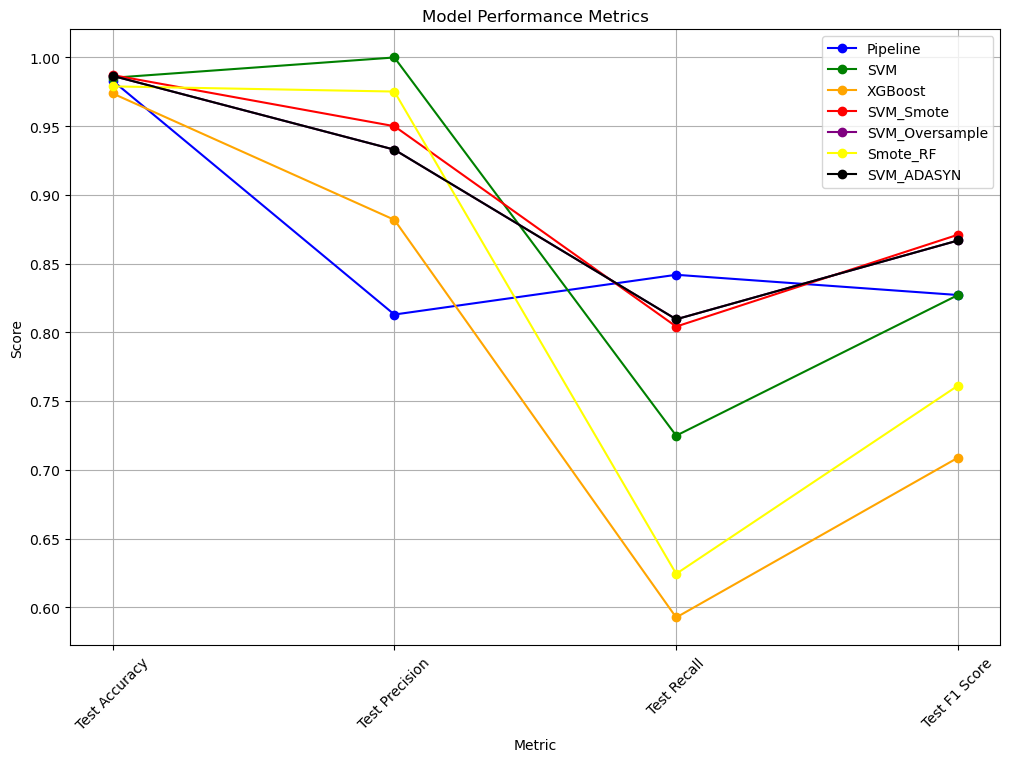

In [227]:
data = {
    'Model': ['Pipeline', 'SVM', 'XGBoost','SVM_Smote','SVM_Oversample','Smote_RF', 'SVM_ADASYN'],
    'Test Accuracy': [test_accuracy_pipeline, test_accuracy_SVM, xgb_test_accuracy, test_accuracy_SVM_Smote, test_accuracy_SVM_Oversample,  test_accuracy_RF_SMOTE,test_accuracy_SVM_ADASYN],
    'Test Precision': [test_precision_pipeline, test_precision_SVM, xgb_test_precision, test_precision_SVM_Smote, test_precision_SVM_Oversample, test_precision_RF_SMOTE, test_precision_SVM_ADASYN],
    'Test Recall': [test_recall_pipeline, test_recall_SVM, xgb_test_recall, test_recall_SVM_Smote, test_recall_SVM_Oversample,test_recall_RF_SMOTE, test_recall_SVM_ADASYN],
    'Test F1 Score': [test_f1_pipeline, test_f1_pipeline, xgb_test_f1, test_f1_SVM_Smote, test_f1_SVM_Oversample,  test_f1_RF_SMOTE, test_f1_SVM_ADASYN]
}

# Create a DataFrame
Vdf = pd.DataFrame(data)

# Set the 'Model' column as the index
Vdf.set_index('Model', inplace=True)

# Transpose the DataFrame for plotting
Vdf_transposed = Vdf.T

# Plotting the models against different metrics
plt.figure(figsize=(12, 8))

# Iterate through each model and plot its metrics
for model, color in zip(Vdf_transposed.columns, ['blue', 'green', 'orange','red','purple','yellow', 'black']):
    plt.plot(Vdf_transposed.index, Vdf_transposed[model], marker='o', linestyle='-', color=color, label=model)

plt.title('Model Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

## Summary/Conclusions

- Combined all text columns to create 'text'
- Created text length columns
- Used random forrest the determined the amount of base learners was best
- Used a pipeline method to vectorize the text info
- Pipeline method was good but not the most optimized
- Used an SVM method with more TFIDF vectorization which produced slightly better results
- Used XGBoost which was significicantly worse than the previous
- Decided to use SVC SMOTe which ended up producing the most consistent results
- Tried different combinations of vectorization and models which ended up not being better
- What seemed to work the best was the SVC model with TFIDF vectorization and SMOTE oversampling